# Nearest Object Classification
Team members:
- Sullivan Crouse

## Overview and External Knowledge
This notebook contains the complete analysis of the [Nearest Earth Object Dataset](https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024?resource=download). This dataset contains information about Nearest Earth Objects (N.E.O.) which are "comets and astroids that...enter the Earth's neighborhood" ([NASA](https://cneos.jpl.nasa.gov/about/basics.html#:~:text=Near%2DEarth%20Objects%20(NEOs),to%20enter%20the%20Earth's%20neighborhood.)). NASA also classifies N.E.O.s as being "[1.3 astronomical units of the sun](https://www.jpl.nasa.gov/keeping-an-eye-on-space-rocks)". They state that a relatively small number of N.E.O.s are close enough or large enough in size to be closely monitored. The importance of this is, as stated by NASA, is "**knowing the size, shape, mass, composition and structure of these objects helps determine the best way to divert one, should it have an Earth-threatening path.**" These monitored objects are labeled as hazardous in the dataset.

A cool visualization into this from [theskylive.com](https://theskylive.com/near-earth-objects) which has a neat page containging information o fupcoming close approaches as well as a 3d visualization of where the orbits of these objects are in space. One important take away from this is that the names of the space object has a year in it, but it is not hte year of closest approach. Instead it appears to be the year it was discovered.  

## Data and Research Question
The dataset for this problem has the following features (descriptions directly from Kaggle):
- neo_id: unique id for each asteroid
- name: name given by NASA
- absolute_magnitude: describes intrinsic luminosity
- estimated_diameter_min: minimum estimated diameter in kilometres
- estimated_diameter_max: maximum estimated diameter in kilometres
- orbitining_body: planet that the asteroid orbits
- relative_velocity: velocity relative to Earth Kmph
- miss_distance: distance in Kilometres missed
- is_hazardous: Boolean feature that shows whether asteroid is harmful or not


Given that these hazardous N.E.O.s are classified and labeled by NASA, there is not much use for us to try to create a predictive model. Rather a prescriptive model would be a better usecase to help us determine what factors contribute greatly when NASA classifies an object as hazardous. The first thought that comes to mind with this is using a statistical model like Logistic Regression and evaluating the parameters of the model to help identify key components in what makes an object hazardous. We could also do some clustering on the data as well to gleem some more insights. Therefore, the research question for this project is "**what are the key features that make a N.E.O. be classified as hazardous**".



## Packages and Data

Import our packages for data wrangling and exploration

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# removing future warnings
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

Read in our data

In [2]:
df = pd.read_csv('nearest-earth-objects(1910-2024).csv')

Let's get a quick glance at our data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


We can quickly guage a couple of things from this:
- a lot of our data is numeric
- we avge null values in absolute_magnitude, estimated_diameter_min and estimated_diameter_max
- we have an id column which we might not need/want
- we have null values for some of our features

In [4]:
df.head(10)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
5,3656926,(2014 BT8),25.00,0.026580,0.059435,Earth,47477.649832,4.290521e+07,False
6,3421513,(2008 OX1),21.50,0.133216,0.297879,Earth,57853.295346,2.727908e+07,True
7,3541504,(2010 OF101),19.75,0.298233,0.666868,Earth,46972.486794,6.997593e+07,False
8,3836942,(2018 YH),21.70,0.121494,0.271669,Earth,37424.548382,5.657727e+06,True
9,3892166,(2019 UP13),23.45,0.054269,0.121350,Earth,38524.867869,6.166118e+07,False


Other noteable finds from the quick overview are:
- name appears to contain a year in it, which we might be able to extract it
- it looks like we only have the orbiting body of earth, but we should verify it

Let's quickly check the value counts of the orbiting_body and is_hazardous (our target var)

In [5]:
for var in ['orbiting_body','is_hazardous']:
    print(f'Frequencies for {var}:\n{df[var].value_counts(normalize=True)}')

Frequencies for orbiting_body:
orbiting_body
Earth    1.0
Name: proportion, dtype: float64
Frequencies for is_hazardous:
is_hazardous
False    0.872377
True     0.127623
Name: proportion, dtype: float64


We can see from this that Earth is our only value for orbiting_body. We also see that our target variable is pretty unbalanced, so we might need to go through and balance our dataset before modeling. Lastly let's get a quick understanding of the aggregate statistics of our numeric features.

In [6]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


Notably from this we see that we have some outliers in our data, we'll need to remove these from our dataset. We'll first make a helper function for this.

In [7]:
def is_not_outlier(feature: pd.Series) -> pd.Series:
    """
    Function for identifying non outliers within a pandas series

    Parameters
    ----------
    feature : pandas series object

    Returns
    -------
    Boolean series for values that are not outliers

    """
    
    # get lower quartile
    lower = feature.quantile(.25)
    
    # get upper quartile
    upper = feature.quantile(.75)
    
    # get our iqr
    iqr = upper - lower
    
    # create our boolean array
    is_outlier = (feature<(lower-1.5*iqr))|(feature>(upper+1.5*iqr))
    
    return is_outlier

Nopw let's check how many outliers we have over all across all features. This should help us see how many records we might lose if we removed them all. Shoutout to [stackoverflow](https://stackoverflow.com/questions/20528328/numpy-logical-or-for-more-than-two-arguments) for helping me easily find out how to do this logical_or.

In [8]:
columns = []
for column in df.drop(columns='neo_id').describe().columns:
    columns.append(is_not_outlier(df[column]))

outliers = np.logical_or.reduce(columns)
pd.Series(outliers).value_counts()

False    308245
True      29954
Name: count, dtype: int64

It looks like these outliers represent around 10% of our data, which is around the amount of hazardous objects we have. Let's verify they are not correlated, if they are we shouldn't drop them. We'll use a chisquare association test (used this [article](https://www.stratascratch.com/blog/chi-square-test-in-python-a-technical-guide/) as reference).

In [9]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['is_hazardous'],outliers))
print(f"At an alpha level of .05 we {'reject' if p <.05 else 'fail to reject'}"
      f" the null hypothesis that outliers and hazardous objects are independent."
      f"\np = {p:.3f}")

At an alpha level of .05 we reject the null hypothesis that outliers and hazardous objects are independent.
p = 0.000


Unfortunately it looks like our outliers are not independent, so we cannot remove them. Next let's move onto feature extraction.

Let's now extract the year from our name feature. Luckily it looks like it appears to be after the opening parenthesis.

In [10]:
df['discovered_year'] = df['name'].apply(lambda x: x.split('(')[1][:4])

Let's check the unique values of our new feature.

In [11]:
df['discovered_year'].unique()

array(['1998', '2008', '2003', '2002', '2011', '2014', '2010', '2018',
       '2019', '2022', '2024', '2000', '2021', '2006', '2004', '2013',
       '1993', '2005', '2007', '2001', '2015', '2017', '1999', '2009',
       '2012', '2016', '2020', '2023', '1991', '1986', '1994', '1975',
       'A918', '1987', '1996', '1995', '1992', '1989', '1977', '1997',
       '1950', '1971', '1990', '1978', '1982', '1988', '1949', 'A911',
       'A924', '1976', '1983', '1948', '1984', '1981', '6743', '1972',
       '1936', '1973', '1980', '1932', '1937', '1974', '1951', '1947',
       'A898', '4788', '1979', '1959', '6344', '1985', '5025', '1960',
       '1968', '1929', '1953', '1963'], dtype=object)

Unfortunately this does not appear to have worked. Perhaps we were a little too brazen with our assumptions. Let's look at the records that have broken our assumption.

In [12]:
unfriendly = df[df['discovered_year'].isin(['A918','A924','6743','A898','4788','6344','5025','A911'])]
unfriendly.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous,discovered_year
338,2000887,887 Alinda (A918 AA),13.88,4.451998,9.954971,Earth,24497.250026,4.795258e+07,False,A918
3876,2000719,719 Albert (A911 TB),15.59,2.025606,4.529393,Earth,25865.435669,3.073963e+07,False,A911
4206,2001036,1036 Ganymed (A924 UB),9.25,37.545248,83.953727,Earth,61537.325800,5.705108e+07,False,A924
6662,2005011,5011 Ptah (6743 P-L),16.70,1.214940,2.716689,Earth,59109.944126,2.359172e+07,True,6743
9353,2000887,887 Alinda (A918 AA),13.88,4.451998,9.954971,Earth,21983.859043,3.161242e+07,False,A918


It looks like our assumptions about the name column were incorrect, not all records contain a year. Let's check to see how many this is.

In [13]:
unfriendly.shape[0]

56

A grand total of 56 records broke our assumption. In a dataset with over 300k records that's not enough records for me to be concerned with. I am drop these records under the justification that they represent such a small percent of records and I believe that the year might be useful. 

In [14]:
df = df[~(df['discovered_year'].isin(['A918','A924','6743','A898','4788','6344','5025','A911']))]
df['discovered_year'] = df['discovered_year'].astype(int)
df.shape

(338143, 10)

While looking at the outlier features in name I noticed that we had a duplicaded record for the asteroid with neo_id of 2000887. Despite this, the relative velocity and miss distance were not the same. This indicates that we might classify an asteroid as hazardous at first, but then our observation changes and we reclassify it. I'm not sure that this is a real concern, but it is at least worth noting. Let's take another look into the name column now to see if we can extract any other useful information from it.

In [15]:
df['name'].unique()[:50]

array(['162117 (1998 SD15)', '349507 (2008 QY)', '455415 (2003 GA)',
       '(2002 PB)', '(2011 DW)', '(2014 BT8)', '(2008 OX1)',
       '(2010 OF101)', '(2018 YH)', '(2019 UP13)', '(2022 CM3)',
       '627157 (2008 OX1)', '(2024 AF)', '162635 (2000 SS164)',
       '(2011 EE41)', '(2021 RA4)', '(2022 CQ2)', '277810 (2006 FV35)',
       '284422 (2006 YD)', '357439 (2004 BL86)', '(2013 LC1)',
       '(2021 CZ2)', '52387 Huitzilopochtli (1993 OM7)', '(2005 FC)',
       '(2007 AM)', '(2007 NL1)', '408980 (2002 RB126)', '(2001 SY169)',
       '(2008 CG)', '(2013 ET)', '(2015 TY237)', '(2017 BL31)',
       '(2019 AP8)', '(2019 KW)', '(2006 BX139)', '(2010 RH178)',
       '(2014 DR)', '(2021 UL)', '(2022 HH3)', '152828 (1999 VT25)',
       '494975 (2009 WO106)', '(2002 RS129)', '(2021 AP1)', '(2024 BC3)',
       '381564 (2008 UW5)', '483432 (2001 DF47)', '(2003 DZ15)',
       '(2012 AC11)', '(2013 CW87)', '(2018 PM9)'], dtype=object)

Lookign at this I cannot discern another other potentially useful information from this. I feel safe to remove this feature. Let's now remove the features that we don't need:
- neo_id since it is a unique id tied to a specific asteroid
- orbiting body since this is only earth
- name since we have already extracted information from it

In [16]:
df.drop(columns=['neo_id','orbiting_body','name'],inplace=True)

Lastly let's do one more check on how many NaN values we have. If we don't have a lot, we'll drop them from our data.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338143 entries, 0 to 338198
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   absolute_magnitude      338115 non-null  float64
 1   estimated_diameter_min  338115 non-null  float64
 2   estimated_diameter_max  338115 non-null  float64
 3   relative_velocity       338143 non-null  float64
 4   miss_distance           338143 non-null  float64
 5   is_hazardous            338143 non-null  bool   
 6   discovered_year         338143 non-null  int32  
dtypes: bool(1), float64(5), int32(1)
memory usage: 17.1 MB


We have less than 50 NaN values, so we''ll just drop these from our dataset.

In [18]:
df.dropna(inplace=True)

## Exploratory Analysis
This section consists of the exploratory analysis done for this project. First we'll quickly go through and look at the distribution of our features. We'll first just look at the feature distributions without comparing the distribution based on our target feature. Also we'll be using the [Freedman-Diaconis](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule) rule to select our number of bins for the histogram.

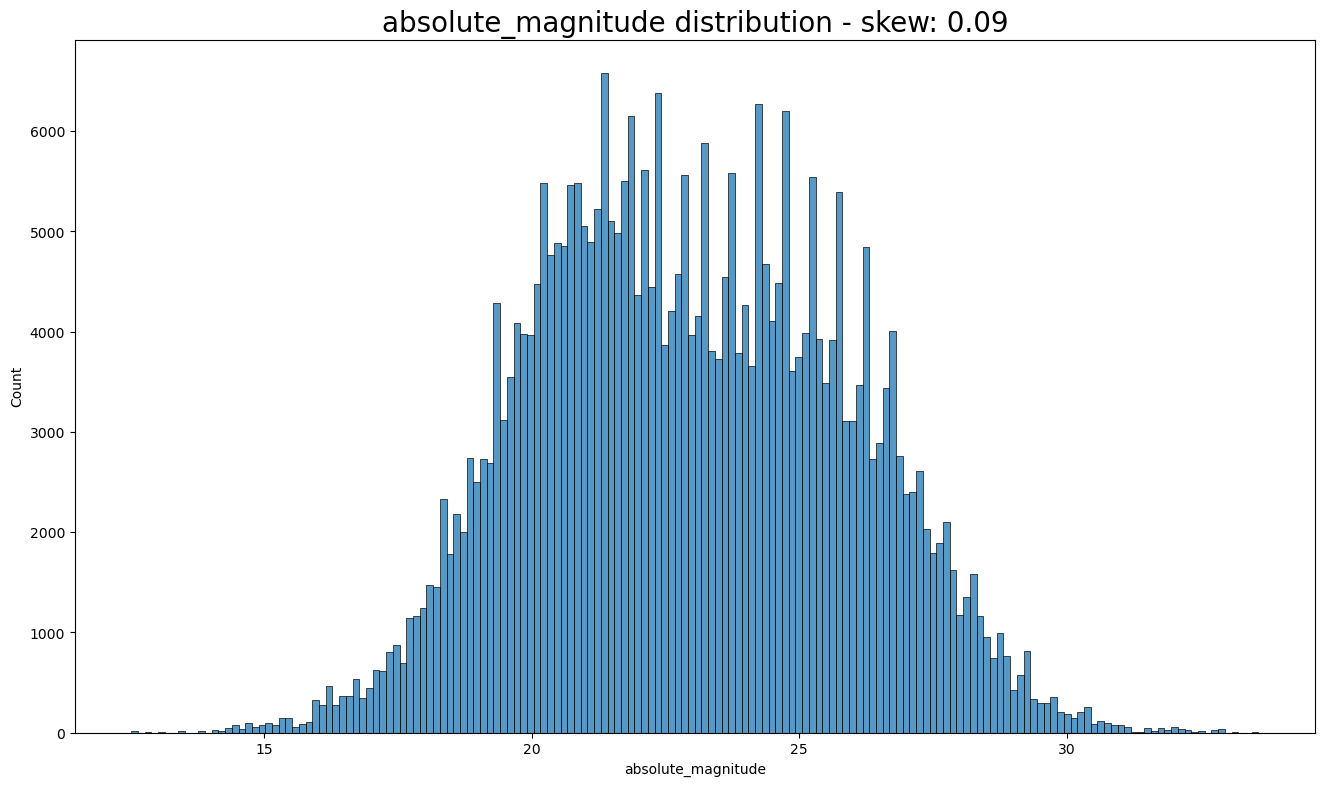

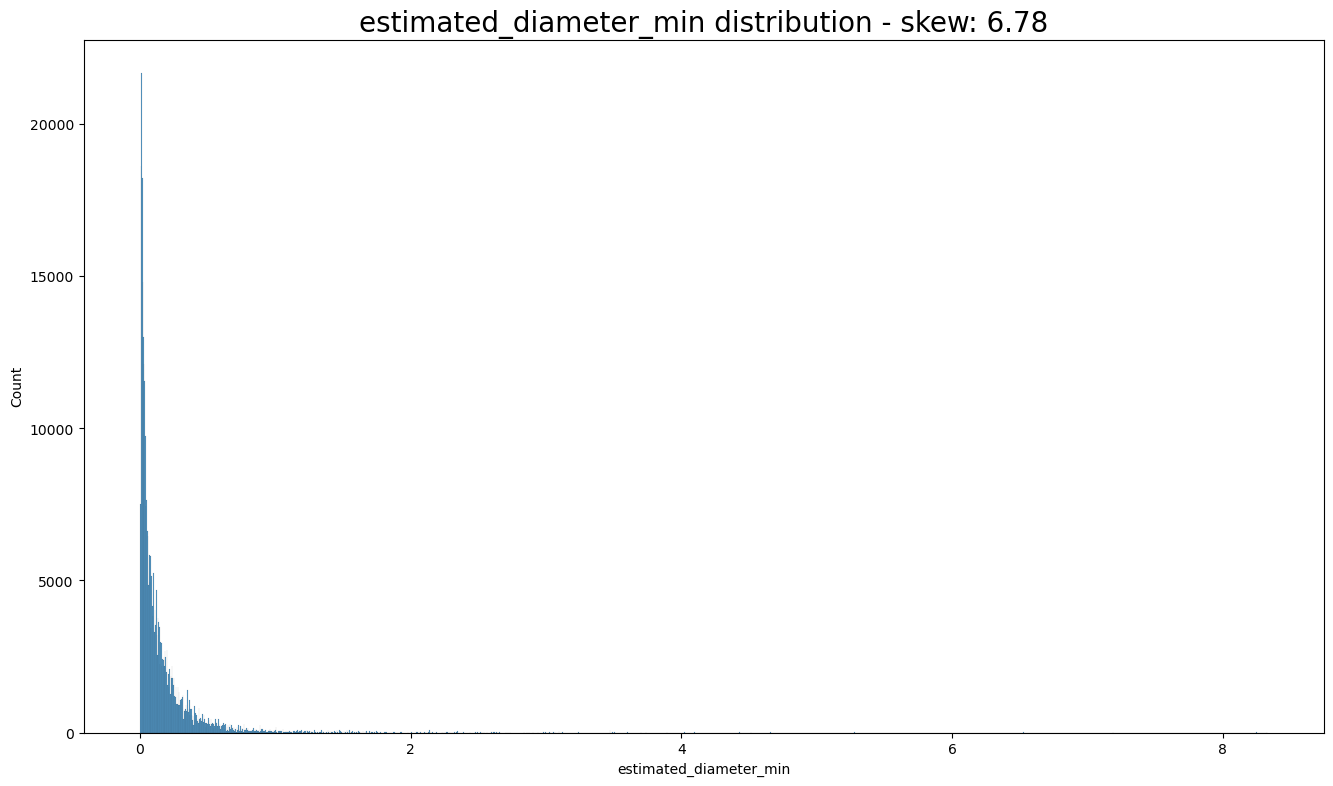

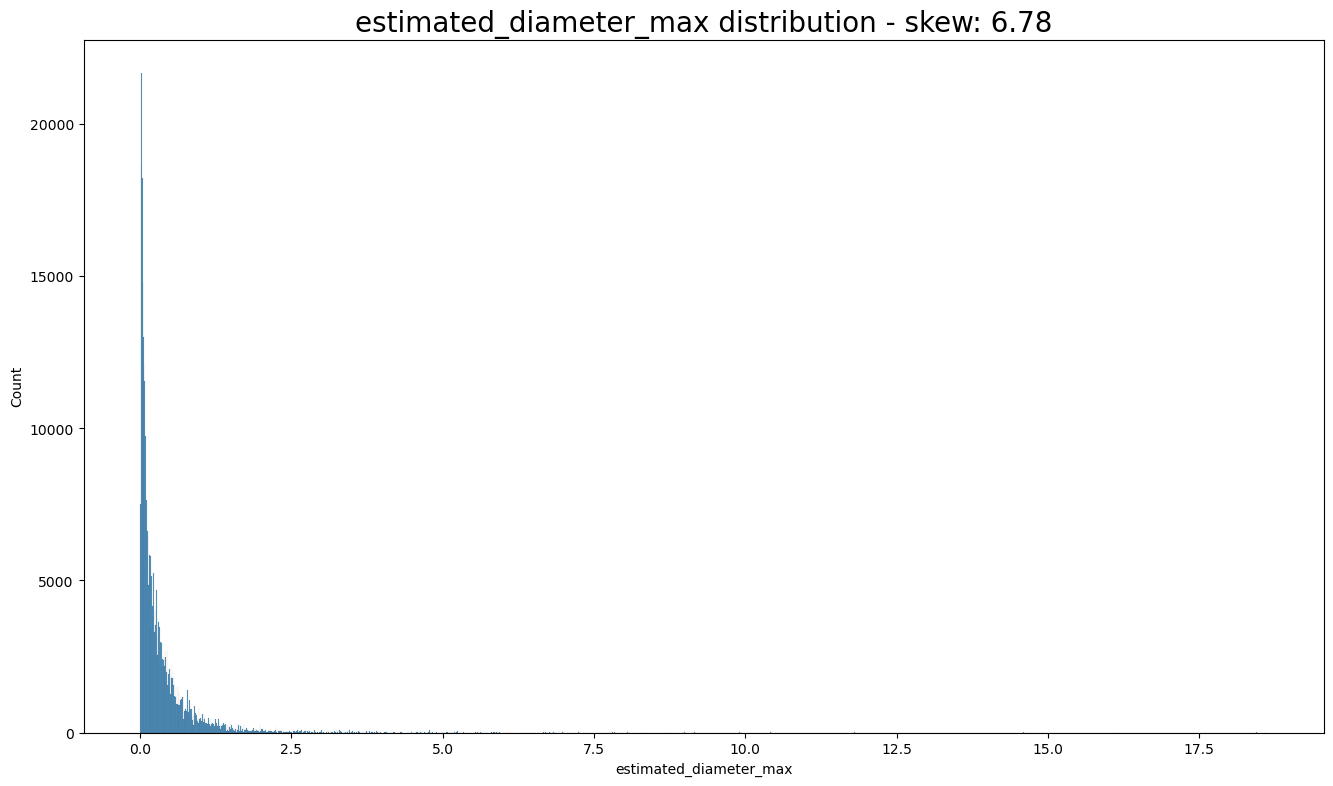

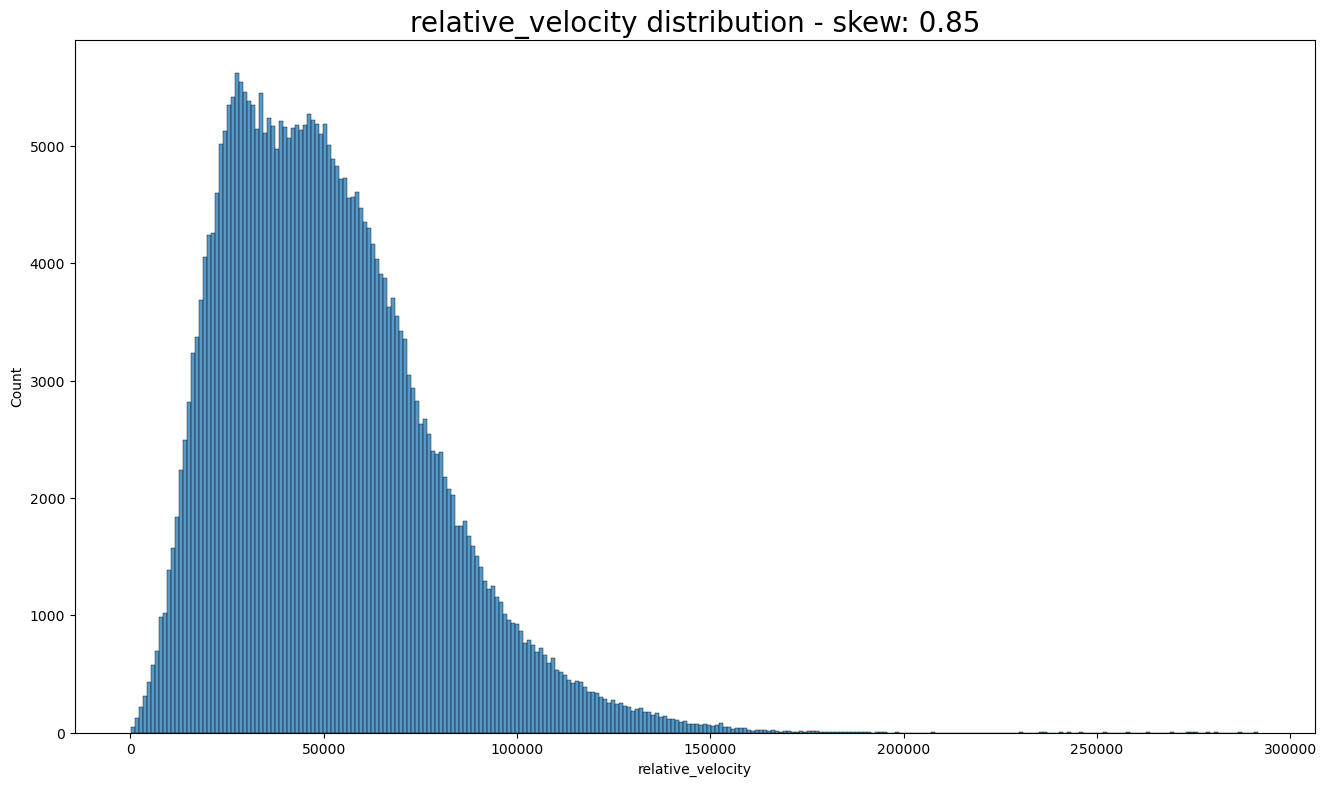

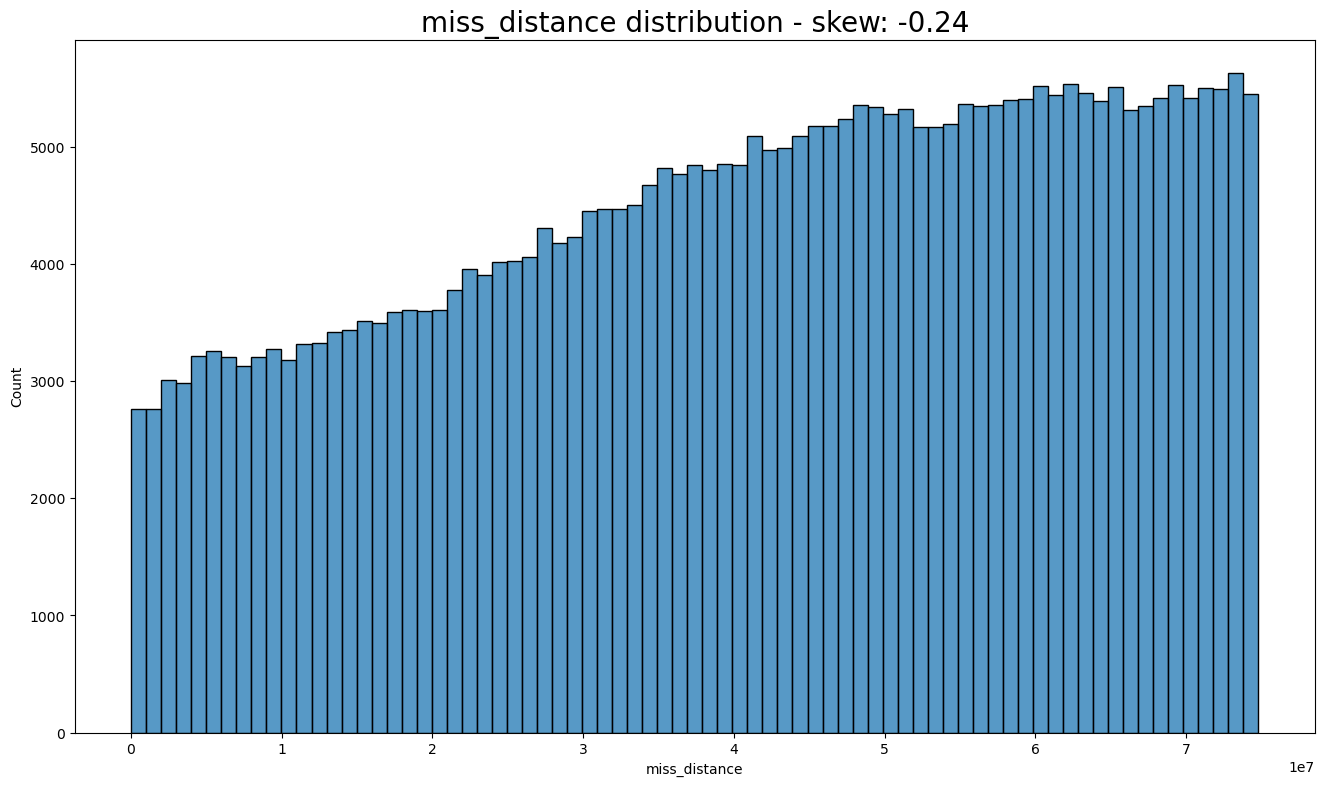

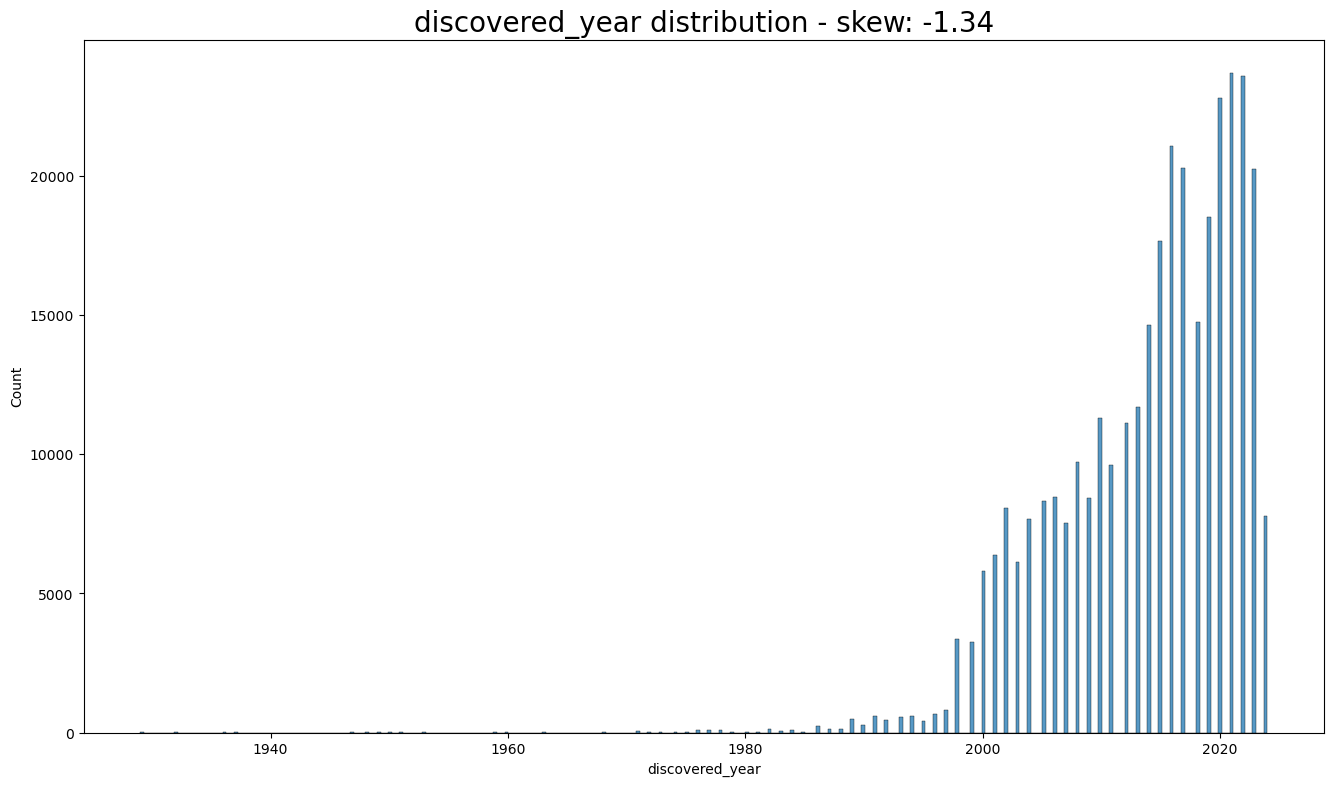

In [19]:
for var in df.drop(columns='is_hazardous').columns:
    plt.figure(figsize=(16,9))
    plt.title(f"{var} distribution - skew: {round(df[var].skew(),2)}",fontsize=20)

    # Next lines calc our bin width for our hist
    iqr = df[var].quantile(.75) - df[var].quantile(.25)
    bin_width = 2 * iqr/(df[var].shape[0]**(1/3)) 
    n_bins = int((df[var].max()-df[var].min())/bin_width)

    sns.histplot(data=df,x=var,bins=n_bins)
    plt.ylabel("Count")
    plt.xlabel(var)
    plt.show()

We can definetly tell that we need to do some normalization and standardization for our data. Particularly we'll need to deal with the incredibly right skew of the estimated diameters and the right skew of the relative velocity. Before we tackle that, let's first see what the frequencies look like for the different classes. I'm not quite sure how we can tackle the problem the years. I'm honestly thinking that the best answer might be to just bin the variable instead of doing a continuous standardization.

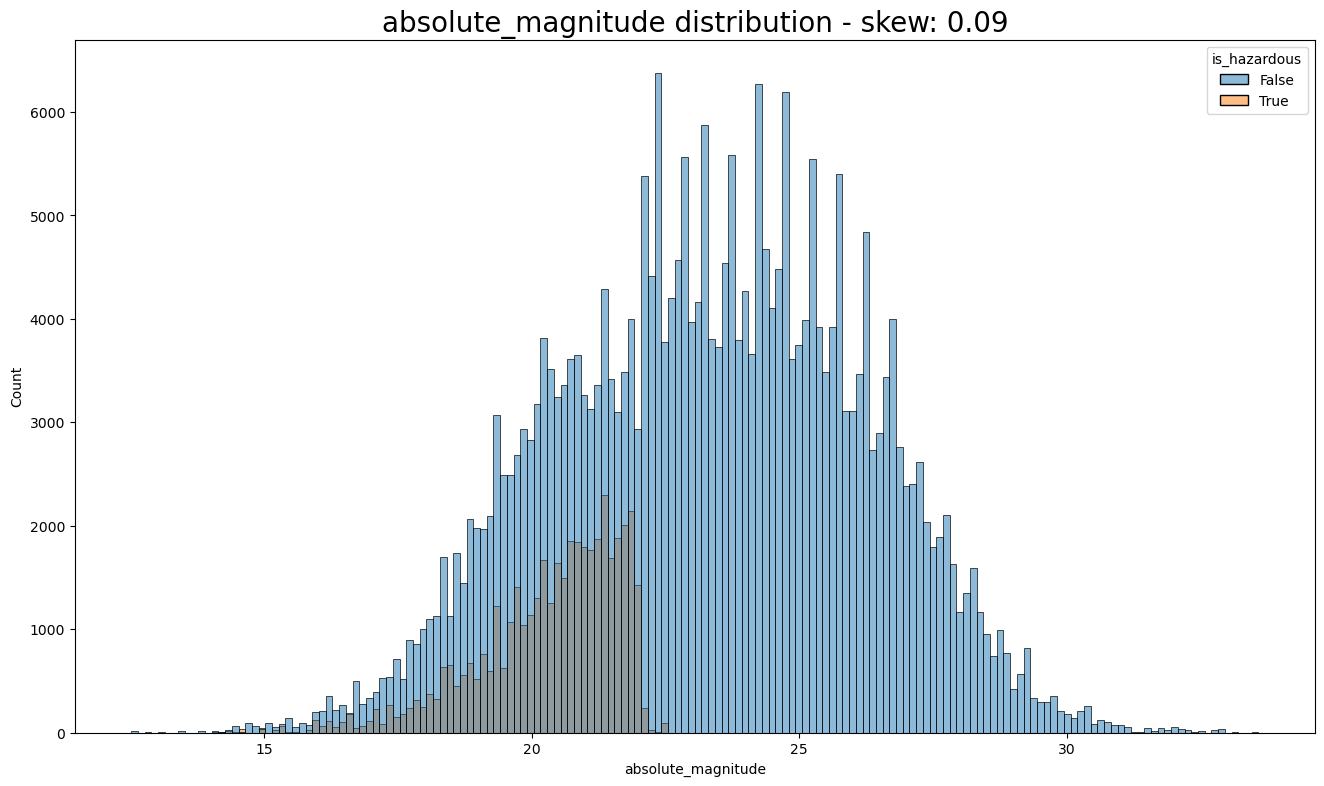

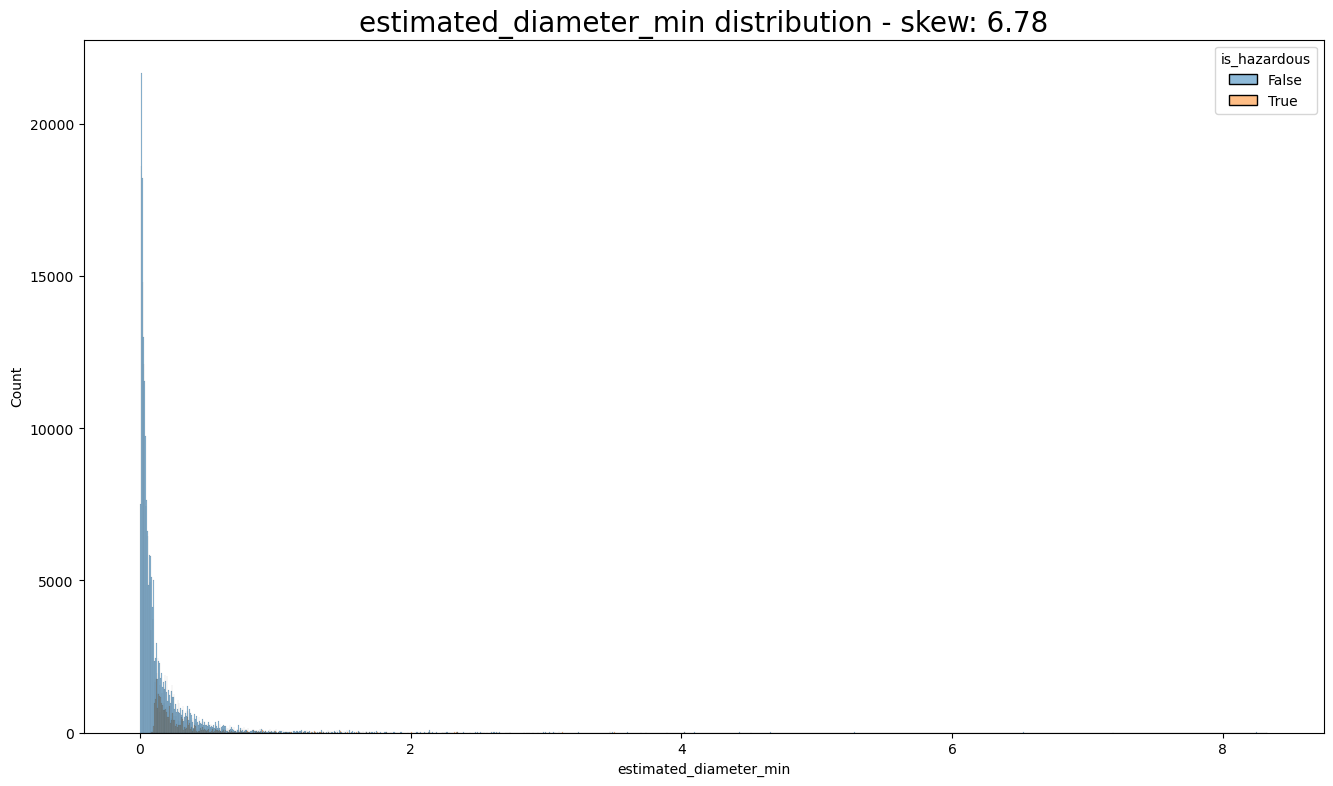

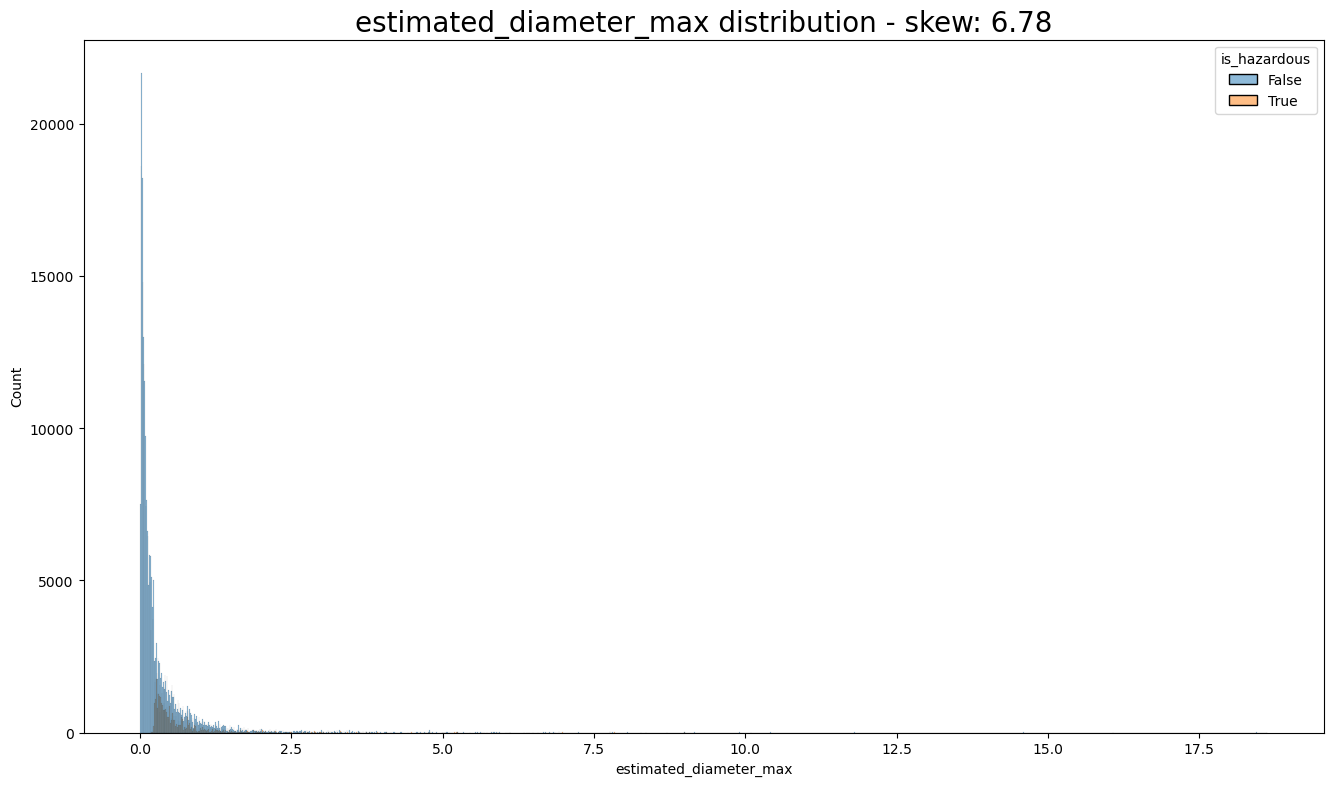

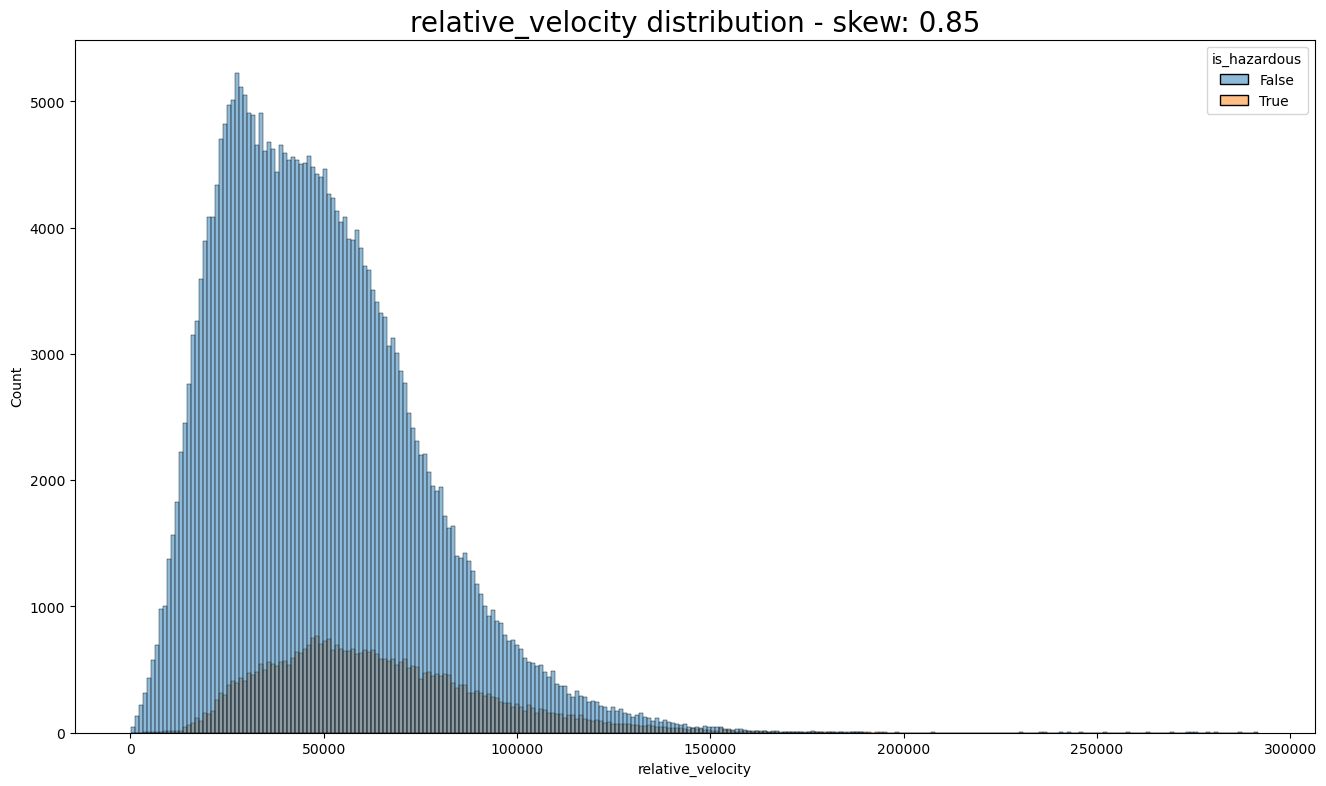

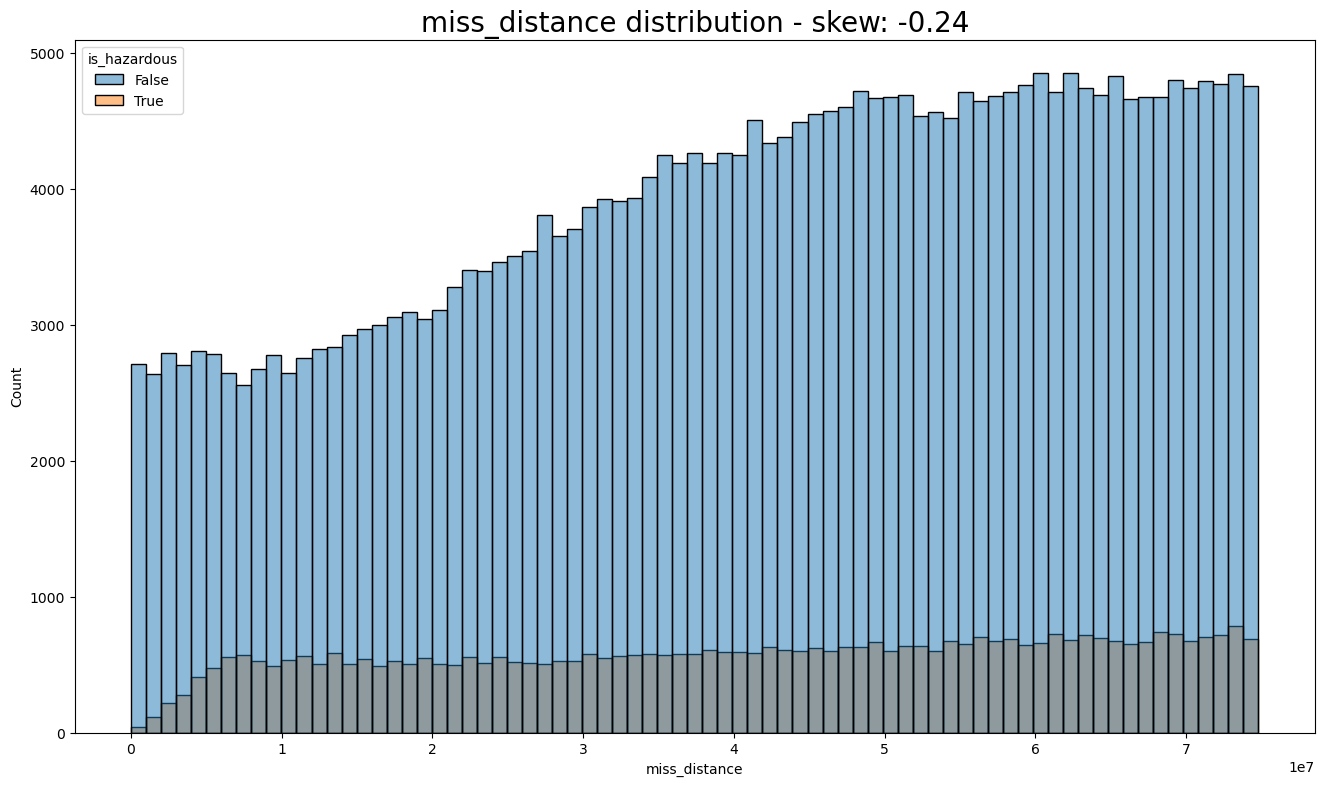

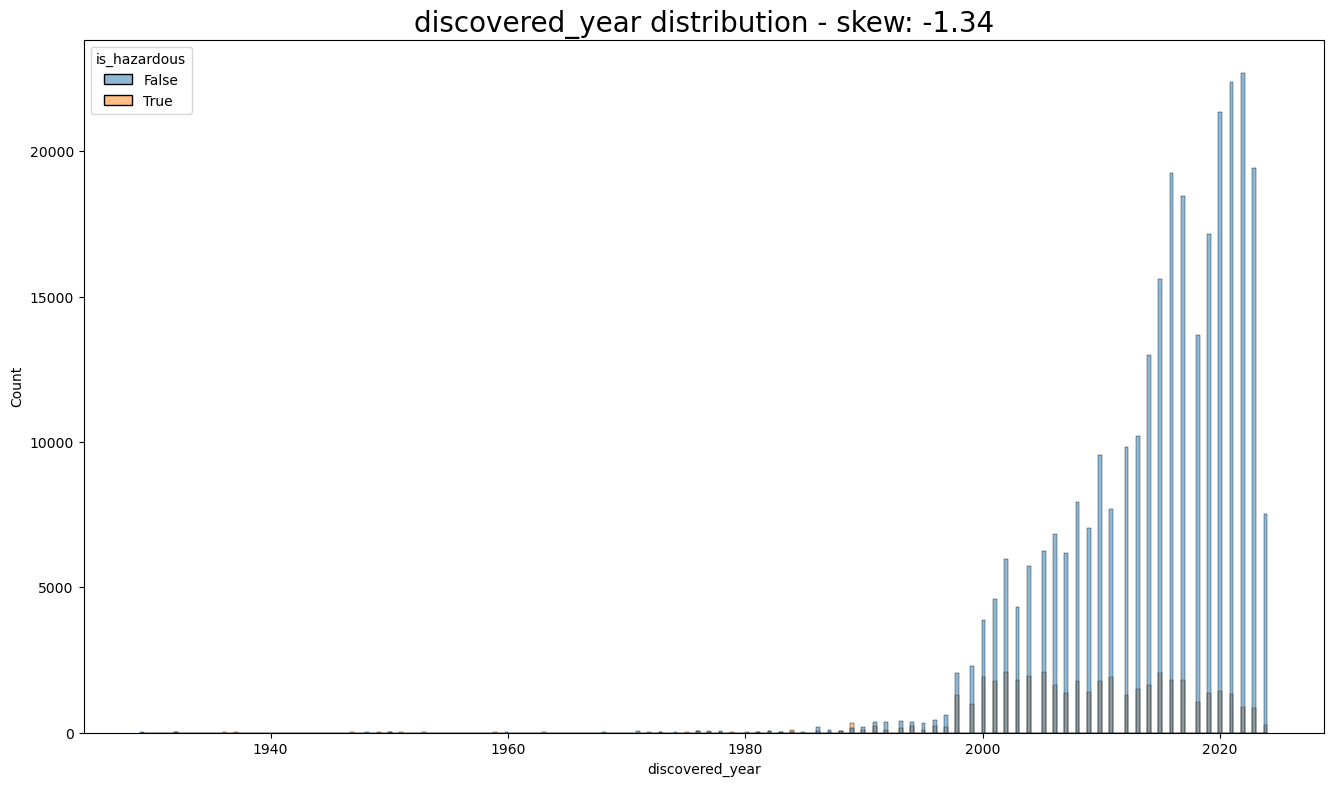

In [20]:
for var in df.drop(columns='is_hazardous').columns:
    plt.figure(figsize=(16,9))
    plt.title(f"{var} distribution - skew: {round(df[var].skew(),2)}",fontsize=20)

    # Next lines calc our bin width for our hist
    iqr = df[var].quantile(.75) - df[var].quantile(.25)
    bin_width = 2 * iqr/(df[var].shape[0]**(1/3)) 
    n_bins = int((df[var].max()-df[var].min())/bin_width)
    
    sns.histplot(data=df,x=var,bins=n_bins,hue='is_hazardous')
    plt.ylabel("Count")
    plt.xlabel(var)
    plt.show()

So some important insights from this are:
- hazardous objects appear to have lower luminousity
- hazardous objects appear to have a higher average relative velocity

Let's now go through and normalize our data. For estimated diameter we'll probably need something stronger than a square root, so we'll take the natural log of these vars.

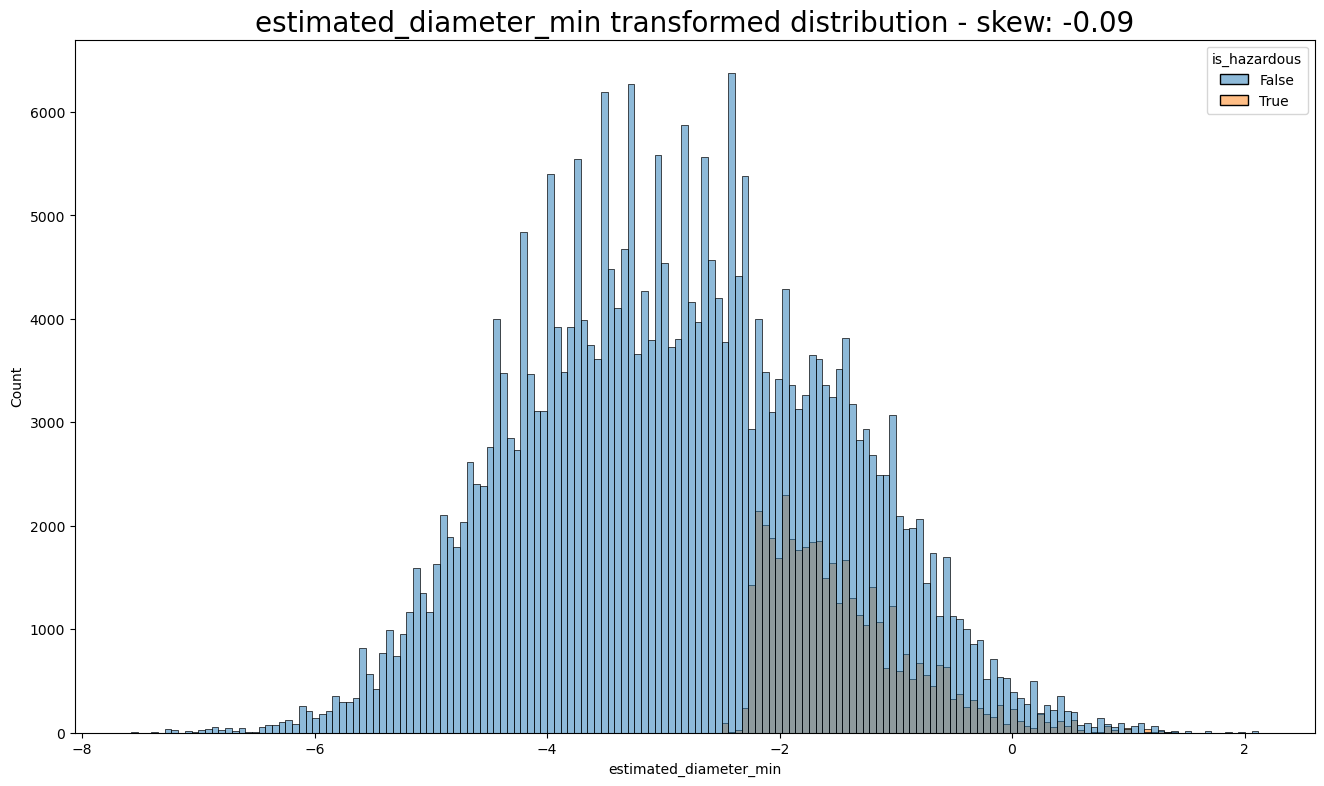

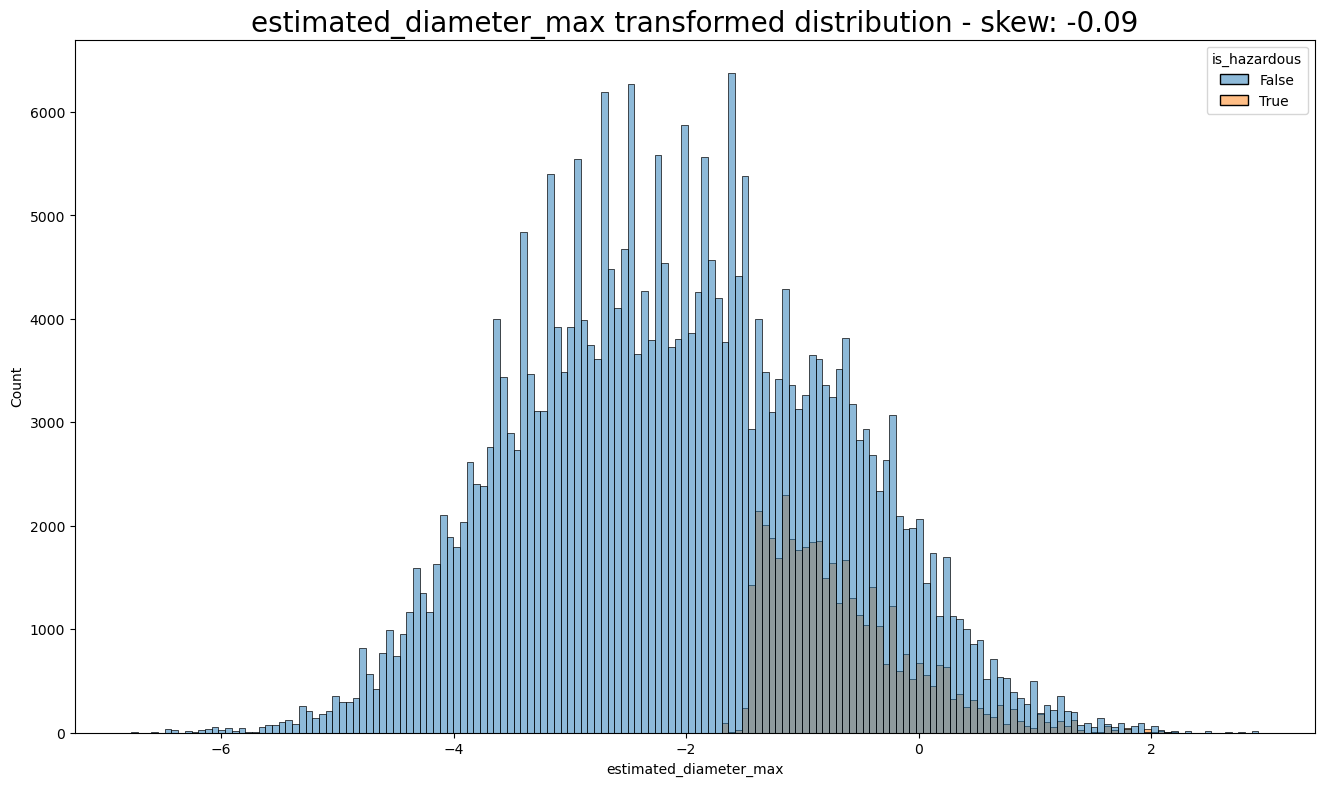

In [21]:
for var in ['estimated_diameter_min','estimated_diameter_max']:
    plt.figure(figsize=(16,9))
    plt.title(f"{var} transformed distribution - skew: {round(np.log(df[var]).skew(),2)}",fontsize=20)

    # Next lines calc our bin width for our hist
    iqr = np.log(df[var]).quantile(.75) - np.log(df[var]).quantile(.25)
    bin_width = 2 * iqr/(np.log(df[var]).shape[0]**(1/3)) 
    n_bins = int((np.log(df[var]).max()-np.log(df[var]).min())/bin_width)
    
    sns.histplot(x=np.log(df[var]),bins=n_bins,hue=df['is_hazardous'])
    plt.ylabel("Count")
    plt.xlabel(var)
    plt.show()

We managed to bink the correct transformation on our first try. Interestingly, it looks like this plot is a mirror of the absolute luminosity variable, event reflected in it's skew. So I guess we just found the mathematical relationship for these two variables LOLL.

Let's now try the velocity by taking the square root of it.

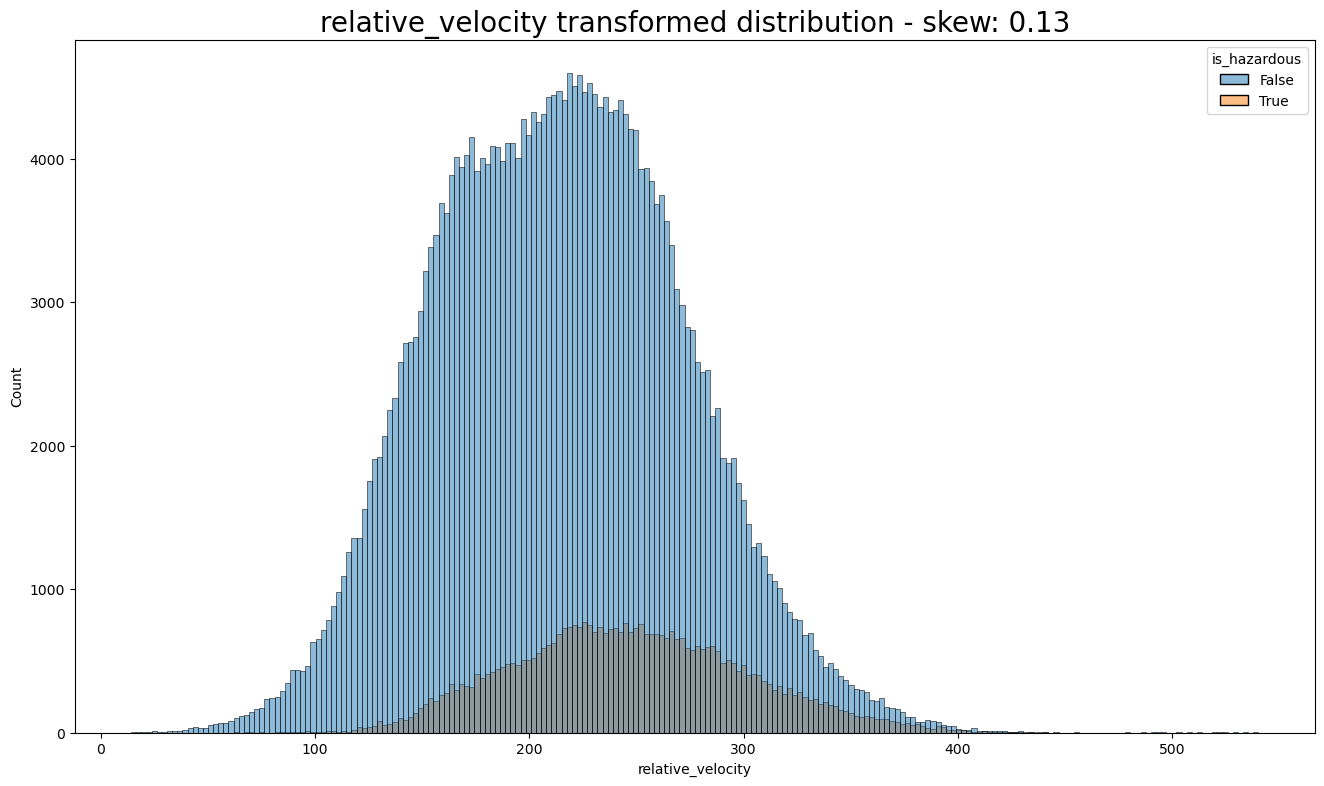

In [22]:
var = 'relative_velocity'
plt.figure(figsize=(16,9))
plt.title(f"{var} transformed distribution - skew: {round(np.sqrt(df[var]).skew(),2)}",fontsize=20)

# Next lines calc our bin width for our hist
iqr = np.sqrt(df[var]).quantile(.75) - np.sqrt(df[var]).quantile(.25)
bin_width = 2 * iqr/(np.sqrt(df[var]).shape[0]**(1/3)) 
n_bins = int((np.sqrt(df[var]).max()-np.sqrt(df[var]).min())/bin_width)
    
sns.histplot(x=np.sqrt(df[var]),bins=n_bins,hue=df['is_hazardous'])
plt.ylabel("Count")
plt.xlabel(var)
plt.show()

This seems to have worked really well. I think I am now happy with how we have normalized our values. Miss distance and year will be ignored for now because I do not have any ideas to tackle them at the moment for normalization. Like I said before I might just bin the discovered year. Let's now go through and apply our transformations.

In [23]:
df_transformed = df.copy()
df_transformed['estimated_diameter_min'] = np.log(df_transformed['estimated_diameter_min'])
df_transformed['estimated_diameter_max'] = np.log(df_transformed['estimated_diameter_max'])
df_transformed['relative_velocity'] = np.sqrt(df_transformed['relative_velocity'])

Let's now see how our variables are correlated with eachother. We have far too many datapoints to do scatterplot matrix. We could sample it, but honestly I don't really care that much to do so.

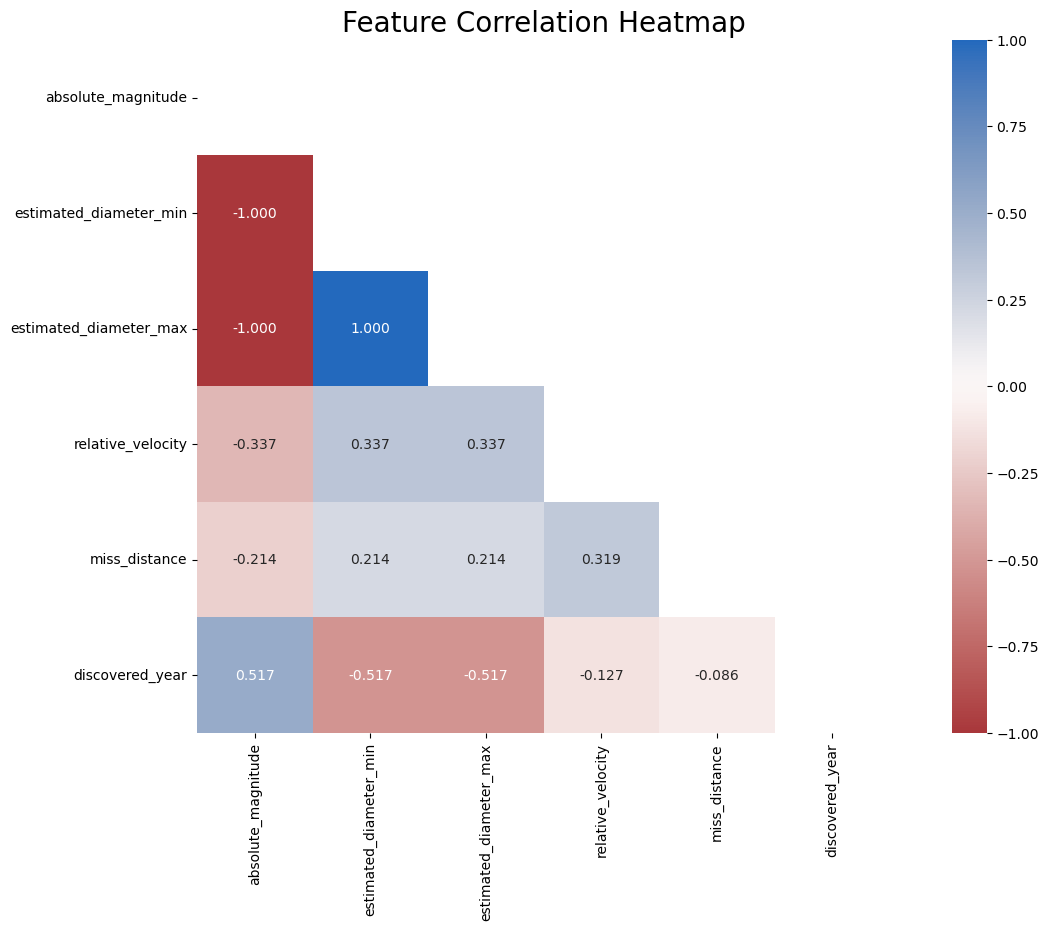

In [24]:
# Get the correlation matrix
feature_corr = df_transformed.drop(columns='is_hazardous').corr()

# mask for upper part of heatmap
trimask = np.triu(np.ones_like(feature_corr, dtype=bool))

# Make our plot
plt.figure(figsize = (16,9))
plt.title("Feature Correlation Heatmap",
         fontsize=20)
sns.heatmap(
    feature_corr,
    vmin=-1, vmax=1, center=0,
    cmap = sns.color_palette("vlag_r", as_cmap=True),
    square=True,
    annot=True,
    fmt='.3f',
    mask=trimask
)
plt.show()

So we definetly have some colinearity within our features, which matters since we're planning to use Logistic Regression which wants no colinearity in features. We should remove the colinear features. My justification is going to be we should keep absolute_magnitude since it was the untransformed feature. Everything else should be fine. Interestingly we also see that there is some positive correlation with discovered year and luminousity, which is pretty interesting, not sure why that would be the case. 

Our final features will be:
- absolute_magnitude
- relative_velocity
- miss_distance
- discovered_year

This should to be pretty interesting moving forward.

## Data Prep for Modeling
This section goes over some more data prep for modeling that we haven't already. This includes creating our training and testing set, scaling or binning our data, as well as the potential creation of interaction variables. I don't believe we need to do a full k-fold cross validation since we actually have a decent amount of records (>300k).

First let's go through and create our modeling dataframe. The dataframe will be contain our baseline features, which were listed above alongside the target variable (is_hazardous).

In [25]:
df_baseline = df_transformed[['absolute_magnitude','relative_velocity',
                              'miss_distance','discovered_year','is_hazardous']]

Now we go through and create our train and test split. Note that any future parameter tuning will be done with a cross validation of the training set.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_baseline.drop(columns='is_hazardous'),
                                                    df_baseline['is_hazardous'],
                                                    test_size=.2,
                                                    stratify=df_baseline['is_hazardous'],
                                                    random_state = 42)

With our train and test sets now made, we'll now move onto building our preprocessing pipeline. Our base pipeline will be as follows:
- Standardize numeric features using [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- Bin year using [K Bins Discretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html). This is because I don't believe that year can be properly normalized and I don't necessarily believe this feature will act like a continuous feature. I think it will more likely act as a control for how the classification might have changed over time.

An additional pipleine will be made for creating interaction variables. Interaction variables exist to capture the [interaction](https://en.wikipedia.org/wiki/Interaction_(statistics)) between two or more independent variables. They are important for being able to potentially capture non-linear interactions in our data for lienar models, like our planned logistic regression. Other model types like decision trees do not rely on this data transformation as much. We'll want them for the following variables:
- absolute_magnitude and relative_velocity
- absolute_magnitude and miss_distance
- relative_velocity and miss_distance
- absolute_magnitude and relative_velocity and miss_distance

Interaction variables can be made using [Polynomial Features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) and setting interaction_only to True. This step will be done before our K Bins Discretizer. Let's now go through and import our functions.

In [27]:
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, PolynomialFeatures
from sklearn.pipeline import make_pipeline

Since we want to only apply certain transformations on certain faetures, we'll have to modify our functions to only fit transform certain classes. We'll do this by creating new classes that have an additional argument for the features they are working with.

In [28]:
class feature_specific_processor:
    """
    Class for processing specific features
    """
    
    def __init__(self,processor, features: list):
        self.processor = processor
        self.features = features
        
    def fit(self, X: pd.DataFrame,*args) -> None:
        # Fit our processor on the features
        self.processor.fit(X[self.features])
        
    def fit_transform(self, X: pd.DataFrame,*args) -> pd.DataFrame:
        # Fit and transform our data on features
        transformed_data = pd.DataFrame(self.processor.fit_transform(X[self.features]))
        transformed_data.columns = self.processor.get_feature_names_out()
        
        # Return a concatenated dataframe
        return pd.concat([X.drop(columns=self.features).reset_index(drop=True),transformed_data],axis=1)
    
    def transform(self, X: pd.DataFrame,*args) -> pd.DataFrame:
        # Transform our data on features
        transformed_data = pd.DataFrame(self.processor.transform(X[self.features]))
        transformed_data.columns = self.processor.get_feature_names_out()
        
        # Return a concatenated dataframe
        return pd.concat([X.drop(columns=self.features).reset_index(drop=True),transformed_data],axis=1)

Let's try out what our new processor looks like on a K Bins Discretizer of our data.

In [29]:
binner = feature_specific_processor(KBinsDiscretizer(n_bins=10,encode='onehot-dense'),['discovered_year'])
print(f"Non scaled df describe:\n{X_train.describe()}")
print(f"Scaled df describe:\n{binner.fit_transform(X_train).describe()}")

Non scaled df describe:
       absolute_magnitude  relative_velocity  miss_distance  discovered_year
count       270492.000000      270492.000000   2.704920e+05    270492.000000
mean            22.934413         218.234130   4.151736e+07      2013.872410
std              2.909724          58.520739   2.077151e+07         7.772723
min             12.520000          14.259959   6.745533e+03      1929.000000
25%             20.747500         175.321386   2.492663e+07      2009.000000
50%             22.800000         218.037679   4.329708e+07      2016.000000
75%             25.100000         258.178372   5.932560e+07      2020.000000
max             33.580000         540.167665   7.479865e+07      2024.000000
Scaled df describe:
       absolute_magnitude  relative_velocity  miss_distance  \
count       270492.000000      270492.000000   2.704920e+05   
mean            22.934413         218.234130   4.151736e+07   
std              2.909724          58.520739   2.077151e+07   
min        

This appears to have worked perfectly, except the column orders have changed. The information is still correct. Let's see how the transform function works.

In [30]:
print(f"Non scaled df describe:\n{X_test.describe()}")
print(f"Scaled df describe:\n{binner.transform(X_test).describe()}")

Non scaled df describe:
       absolute_magnitude  relative_velocity  miss_distance  discovered_year
count        67623.000000       67623.000000   6.762300e+04     67623.000000
mean            22.931836         218.338554   4.160718e+07      2013.850776
std              2.907228          58.583738   2.078720e+07         7.753128
min             12.520000          16.988327   1.492182e+04      1929.000000
25%             20.720000         175.059161   2.500618e+07      2009.000000
50%             22.800000         218.271382   4.344984e+07      2016.000000
75%             25.120000         258.324364   5.940013e+07      2020.000000
max             33.580000         523.167885   7.479451e+07      2024.000000
Scaled df describe:
       absolute_magnitude  relative_velocity  miss_distance  \
count        67623.000000       67623.000000   6.762300e+04   
mean            22.931836         218.338554   4.160718e+07   
std              2.907228          58.583738   2.078720e+07   
min        

Again this appears to have worked. Great, let's now go through and build our pipelines.

In [31]:
base_pipeline = make_pipeline(
        # Scaler
        feature_specific_processor(StandardScaler(),['absolute_magnitude','relative_velocity',
                              'miss_distance']),
        # Binner
        feature_specific_processor(KBinsDiscretizer(n_bins=10,encode='onehot-dense'),['discovered_year'])
)

interaction_pipeline =  make_pipeline(
        # Scaler
        feature_specific_processor(StandardScaler(),['absolute_magnitude','relative_velocity',
                              'miss_distance']),
        # Interaction Vars
        feature_specific_processor(PolynomialFeatures(degree=3,interaction_only=True),
                                   ['absolute_magnitude','relative_velocity',  'miss_distance']),
        # Binner
        feature_specific_processor(KBinsDiscretizer(n_bins=10,encode='onehot-dense'),['discovered_year'])
)

Now we can finally go through and create our datasets for modeling.

In [32]:
X_train_base =  base_pipeline.fit_transform(X_train)
X_train_interaction = interaction_pipeline.fit_transform(X_train).drop(columns='1')
X_test_base = base_pipeline.transform(X_test)
X_test_interaction = interaction_pipeline.transform(X_test).drop(columns='1')

Now without our data processed for modeling, it's time to get to the fun part, modeling.

## The Fun Part (Modeling)
Now we'll get to the modeling portion of this project. First we'll aim to solve our research question using a prescriptive model. We'll do this using a logistic regression. We'll be using stats models api for logistic regression since it has the benefit of having a nicely formatted regression table. 

In [33]:
import statsmodels.api as sma
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

Let's also get our baseline accuracy for this problem.

In [34]:
y_test.value_counts(normalize=True)

is_hazardous
False    0.87241
True     0.12759
Name: proportion, dtype: float64



We have identified that our baseline accuracy is 87.24%. Now we'll build the model. Note [stats models](https://tedboy.github.io/statsmodels_doc/generated/generated/statsmodels.api.Logit.html) requires us to add a constant to logit if we want a constant. We'll also get a regression table for our model.

In [35]:
base_logit = sma.Logit(y_train.reset_index(drop=True),sma.add_constant(X_train_base)).fit()
print(base_logit.summary())

Optimization terminated successfully.
         Current function value: 0.305225
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           is_hazardous   No. Observations:               270492
Model:                          Logit   Df Residuals:                   270478
Method:                           MLE   Df Model:                           13
Date:                Sun, 04 Aug 2024   Pseudo R-squ.:                  0.2005
Time:                        20:09:26   Log-Likelihood:                -82561.
converged:                       True   LL-Null:                   -1.0327e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.2764    7.2e+04  -3.16e-05      1.000   -1.41e+05    1.41e+05
ab

We can clearly see from the regression table that we only have 3 statistically significant features:
- absolute_magnitude
- relative_velocity
- miss_distance
We might consider removing year from our features. Let's check what the prediction power of our model would be.

In [36]:
y_prob_base = base_logit.predict(sma.add_constant(X_test_base))
y_predicted_base = round(y_prob_base)

print(f"The accuracy of our base model was: {accuracy_score(y_test,y_predicted_base)*100:.2f}%")

The accuracy of our base model was: 86.29%


This is not a very good performance of our model. Remember our baseline for this model is 87.24%. Let's go through and look at the confusion matrix to see what the problem was. First we'll make a function for making a pretty confusion matrix which will include some other statistics for model performance.

In [37]:
def make_confusion_matrix(y_true,y_pred,
                          figsize=(16,9),
                          title=None,
                          percent=True,
                          count=True,
                          **kwargs):

    
    
    # make our confusion matrix
    matrix = confusion_matrix(y_true,y_pred)
    
    statistics = ""
    
    # Accuracy is the diagonal / matrix
    accuracy = np.trace(matrix)/np.sum(matrix)
    
    statistics += f"Accuracy: {accuracy*100:.2f}%"
    
    # Precision is true positives / predicted positives
    precision = matrix[1,1]/sum(matrix[:,1])
    
    statistics += f"\nPrecision: {precision*100:.2f}%"
    
    # Recall is true positives / actual positives
    recall = matrix[1,1]/sum(matrix[1,:])
    
    statistics += f"\nRecall: {recall*100:.2f}%"
    
    # F1 is the harmonic mean of precision and recall
    f1 = 2*precision*recall/(precision+recall)
    
    statistics += f"\nF1: {f1*100:.2f}%"
    
    # Getting our annotation
    blanks = ['' for i in range(matrix.size)]
    
    # For the count of records
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in matrix.flatten()]
    else:
        group_counts = blanks
    
    # For the percent of records
    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}".strip() for v1, v2 in zip(group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(matrix.shape[0],matrix.shape[1])
    
    plt.figure(figsize=figsize)
        
    sns.heatmap(matrix,annot=box_labels,fmt="",**kwargs)
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label\n'+statistics)
    
    if title:
        plt.title(title)
    
    plt.show()

Let's see what this looks like.

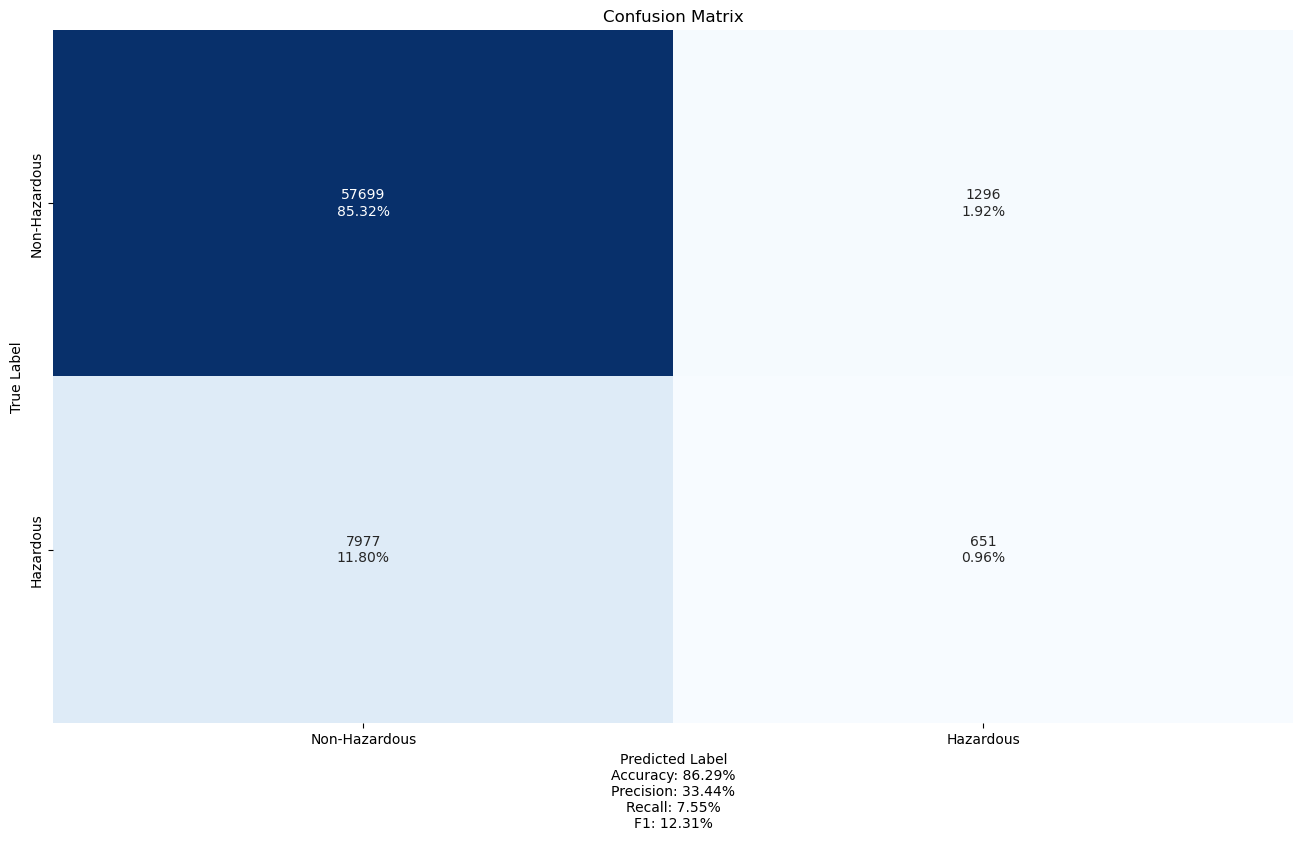

In [38]:
make_confusion_matrix(y_test,y_predicted_base,cmap='Blues',
                      cbar=False,xticklabels=['Non-Hazardous','Hazardous'],
                     yticklabels=['Non-Hazardous','Hazardous'],
                     title='Confusion Matrix')

As we suspected, there seems to be a balancing problem here. We are **heavily** favored for predicting non-hazardous as the classes are very unbalanced. Let's try to see if our interaction model is able to fix this.

In [39]:
interaction_logit = sma.Logit(y_train.reset_index(drop=True),sma.add_constant(X_train_interaction)).fit()
print(interaction_logit.summary())

Optimization terminated successfully.
         Current function value: 0.297173
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           is_hazardous   No. Observations:               270492
Model:                          Logit   Df Residuals:                   270474
Method:                           MLE   Df Model:                           17
Date:                Sun, 04 Aug 2024   Pseudo R-squ.:                  0.2216
Time:                        20:09:28   Log-Likelihood:                -80383.
converged:                       True   LL-Null:                   -1.0327e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                       

Importantly our interaction variables appear to be statistically significant. Let's see if they lead to more predictive performance.

The accuracy of our base model was: 86.87%


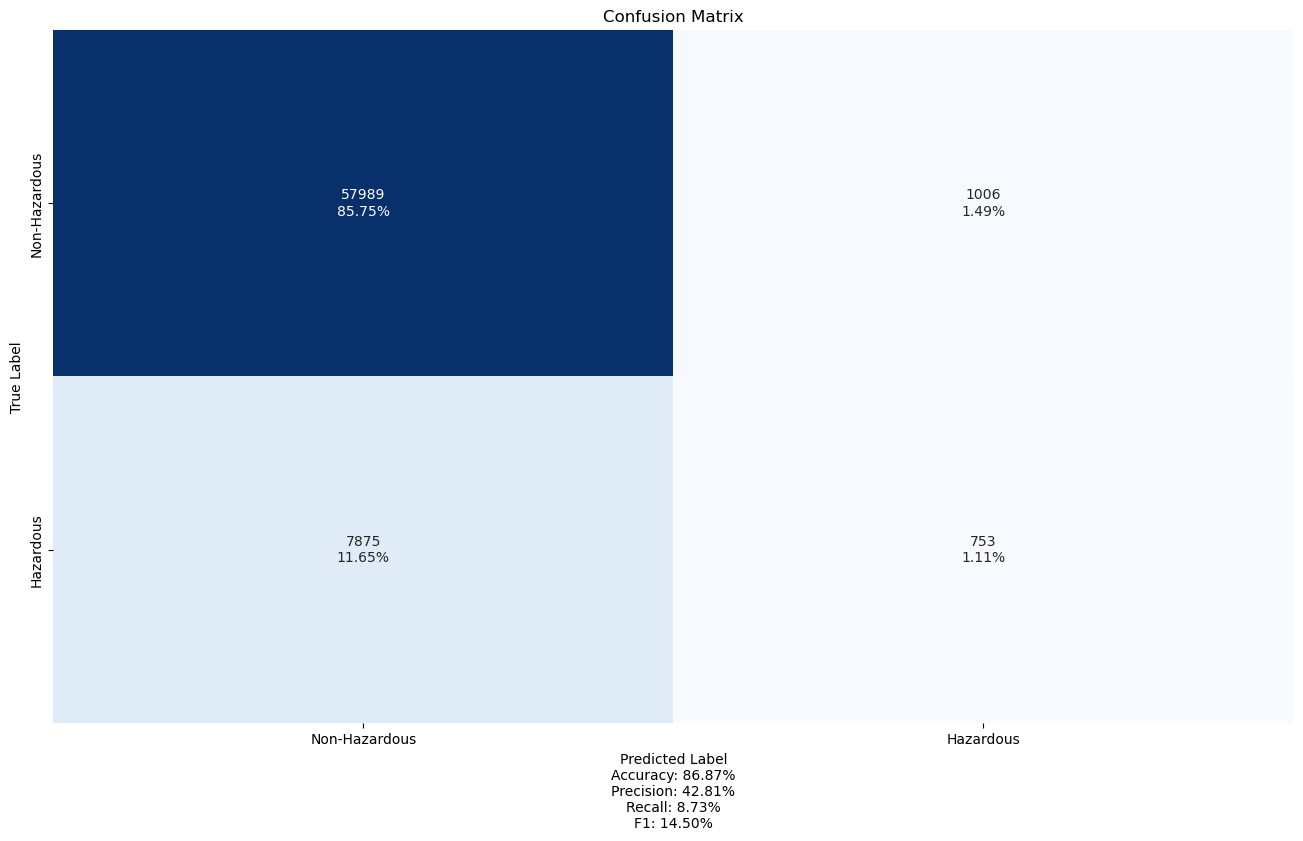

In [40]:
y_prob_interaction = interaction_logit.predict(sma.add_constant(X_test_interaction))
y_predicted_interaction = round(y_prob_interaction)

print(f"The accuracy of our base model was: {accuracy_score(y_test,y_predicted_interaction)*100:.2f}%")
make_confusion_matrix(y_test,y_predicted_interaction,cmap='Blues',
                      cbar=False,xticklabels=['Non-Hazardous','Hazardous'],
                     yticklabels=['Non-Hazardous','Hazardous'],
                     title='Confusion Matrix')

We see a little bit of performance increase here, but still nothing great. At this point I am convinced that the added noise of the discovered year has been detrimental to our model. Let's try to remove it and try again. We'll keep our interaction variables.

In [41]:
cleaned_pipeline =  make_pipeline(
        # Scaler
        feature_specific_processor(StandardScaler(),['absolute_magnitude','relative_velocity',
                              'miss_distance']),
        # Interaction Vars
        feature_specific_processor(PolynomialFeatures(degree=3,interaction_only=True),
                                   ['absolute_magnitude','relative_velocity',  'miss_distance'])
)
# Drop the column title 1
X_train_cleaned =  cleaned_pipeline.fit_transform(X_train.drop(columns='discovered_year')).drop(columns='1')
X_test_cleaned = cleaned_pipeline.transform(X_test.drop(columns='discovered_year')).drop(columns='1')

Now we do one last logit.

In [42]:
cleaned_logit = sma.Logit(y_train.reset_index(drop=True),sma.add_constant(X_train_cleaned)).fit()
print(cleaned_logit.summary())

Optimization terminated successfully.
         Current function value: 0.299313
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:           is_hazardous   No. Observations:               270492
Model:                          Logit   Df Residuals:                   270484
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Aug 2024   Pseudo R-squ.:                  0.2160
Time:                        20:09:29   Log-Likelihood:                -80962.
converged:                       True   LL-Null:                   -1.0327e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                       

It looks like everything is now constant. Let's check how this affected predictive performance.

The accuracy of our base model was: 86.82%


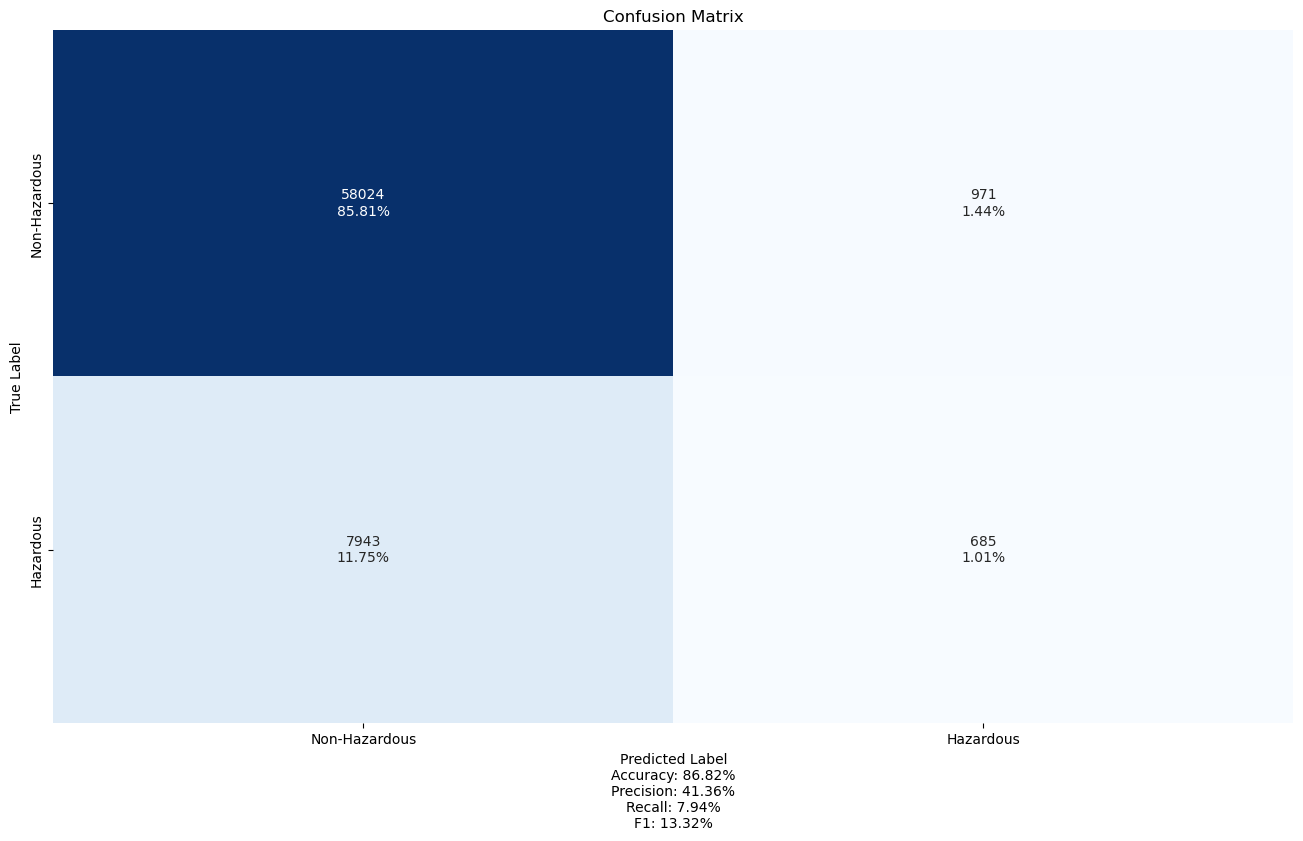

In [43]:
y_prob_cleaned = cleaned_logit.predict(sma.add_constant(X_test_cleaned))
y_predicted_cleaned = round(y_prob_cleaned)

print(f"The accuracy of our base model was: {accuracy_score(y_test,y_predicted_cleaned)*100:.2f}%")
make_confusion_matrix(y_test,y_predicted_cleaned,cmap='Blues',
                      cbar=False,xticklabels=['Non-Hazardous','Hazardous'],
                     yticklabels=['Non-Hazardous','Hazardous'],
                     title='Confusion Matrix')

Unfortunately we are not able to get very good predictive performance out of this model. However, this model has absolutely served the purpose. We have been able to identify the important features in the classification. We were able to find this based on the statistical significance of each variable. We'll be interpreting the regression results from the last logit we looked at since all the variables were statistically significant.
- const: on the whole we are more likely to classify a NEO as non hazardous
- absolute magnitude: as the absolute maginitude increases, the likelihood of a NEO being hazardous decreases. This makes sense as this is inverse with e raised to estimated diameter, or the size. So as a the size increases, the likelihood of of a NEO being hazardous increases
- relative velocity: as the relative velocity increases, the likelihood of a NEO being hazardous increases.
- miss_distance: as the miss distance increases, the likelihood of a NEO being hazardous decreases.
- absolute magnitude x relative velocity: as this interaction increases, the likelihood of a NEO being hazardous increases.
- absolute_magnitude x miss_distance: as this interaction increases, the likelihood of a NEO being hazardous increases.
- relative_velocity miss_distance: as this interaction increases, the likelihood of a NEO being hazardous decreases.
- absolute_magnitude x relative_velocity x miss_distance: as this interaction increases, the likelihood of a NEO being hazardous decreases.

Let's now go through and try for some more predictive performance. Without further adiu, let's go through get some models.

In [44]:
from xgboost import XGBClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB

Now we create our models

In [45]:
models = {
    'Gradient Boosting': GBC(random_state=42),
    'Random Forest': RFC(random_state=42,n_jobs=-1),
    # SVM removed due to runtime
    #'Support Vector Machine': SVC(gamma='auto',random_state=42),
    'Decision Tree': DT(max_depth=15,random_state=42),
    'K Nearest Neighbors': KNN(n_neighbors=20,n_jobs=-1),
    'Discriminant Analysis': LDA(),
    'Gaussian Naive Bayes': GaussianNB()
}

Now we'll loop through our models and evaluate performance on each of these models.

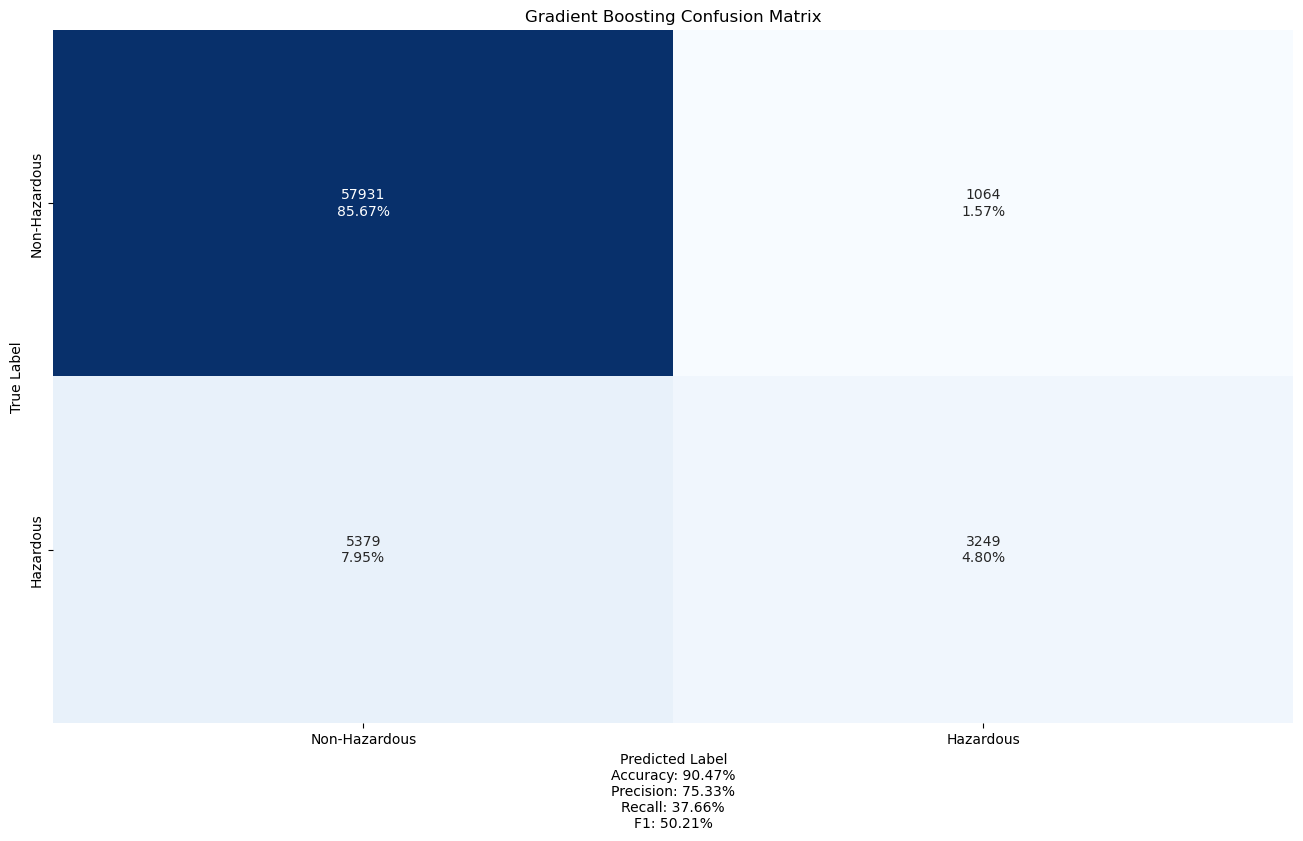

Log loss is: 0.1988


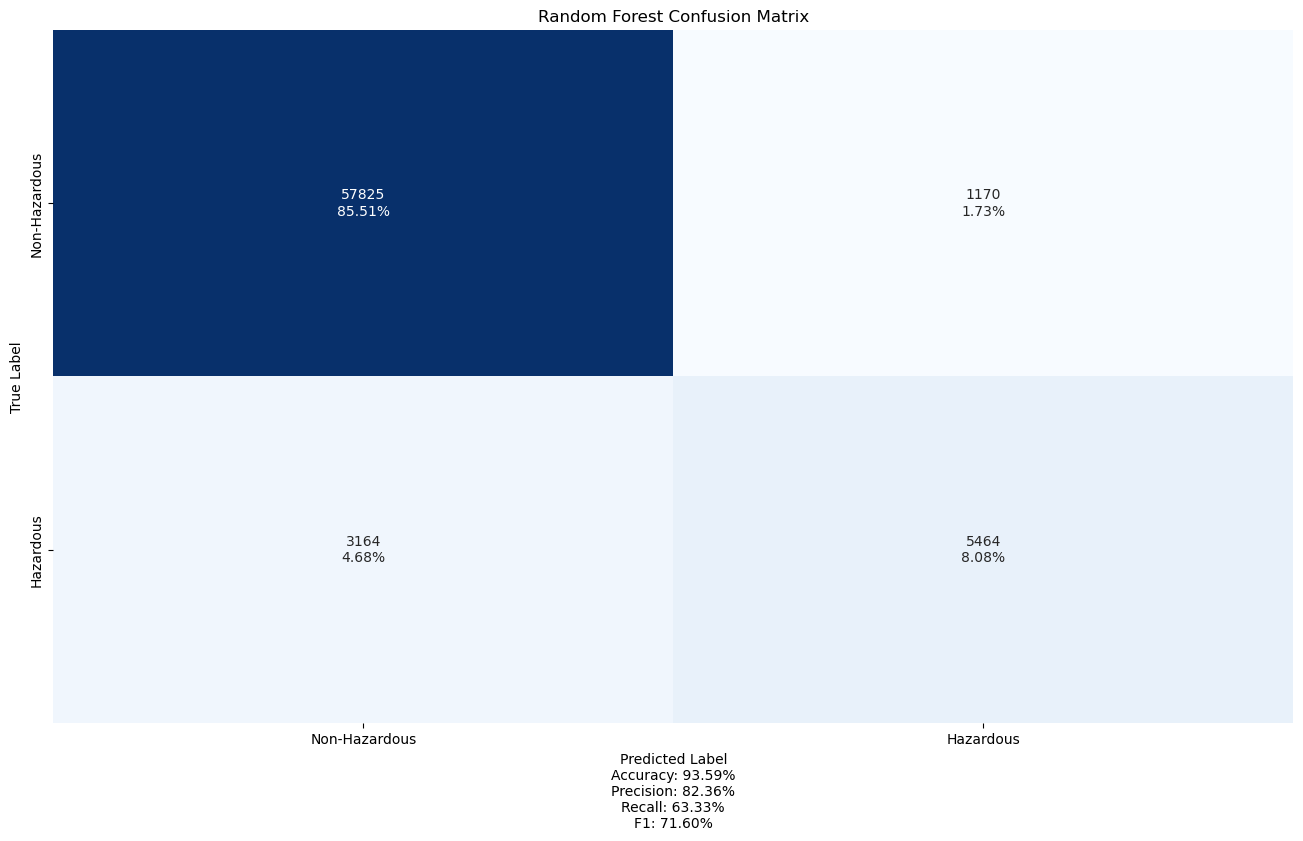

Log loss is: 0.1498


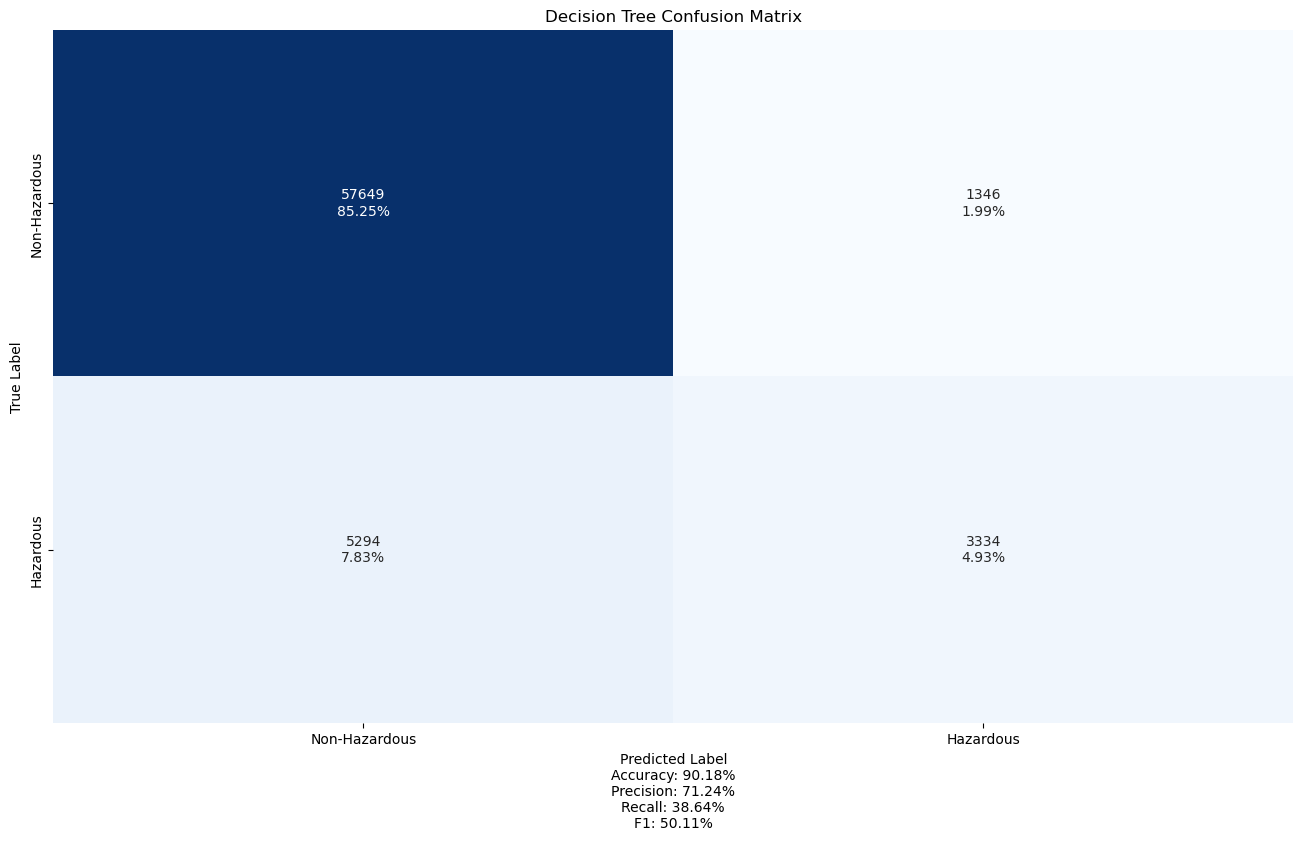

Log loss is: 0.4390


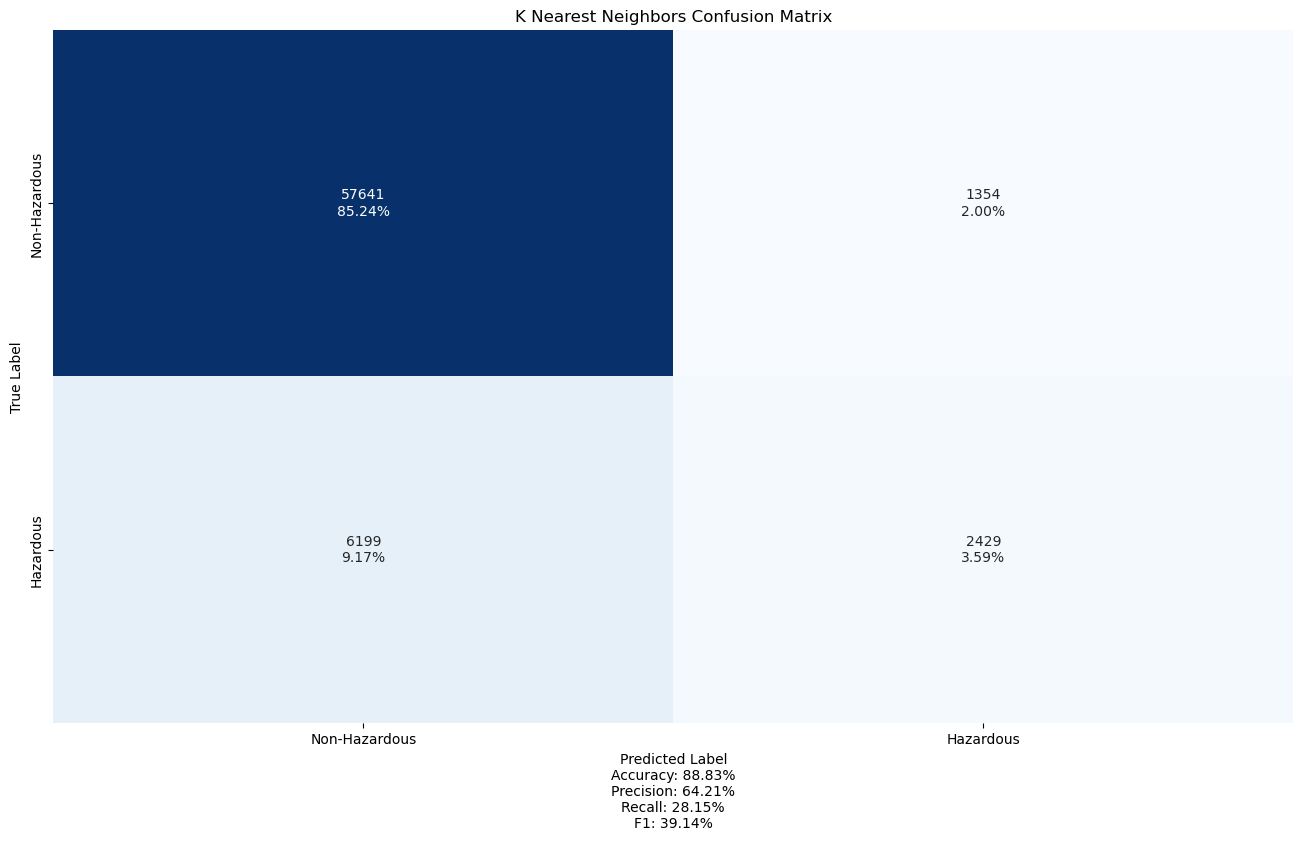

Log loss is: 0.2573


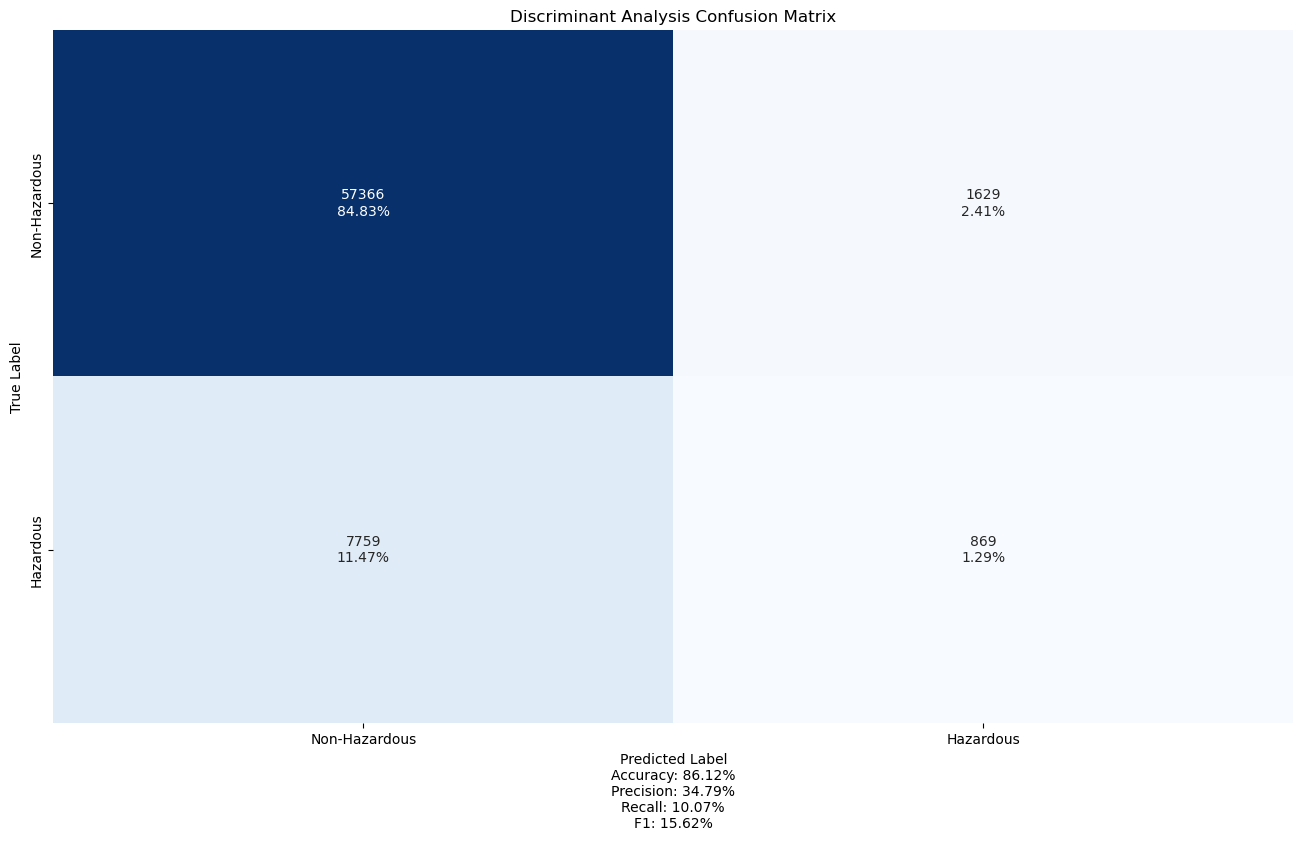

Log loss is: 0.3076


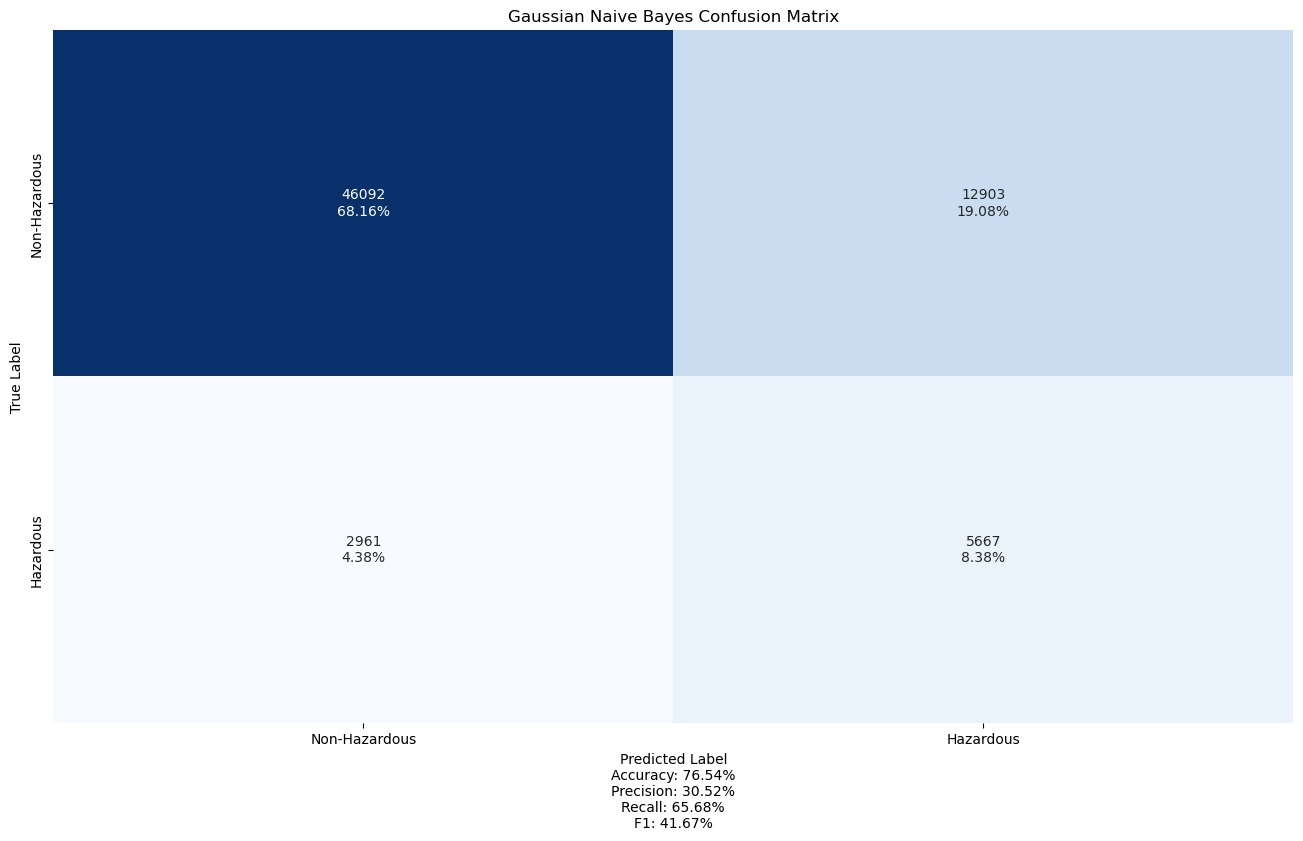

Log loss is: 0.7525


In [46]:
for name, model in models.items():
    
    # train the model
    model.fit(X_train_base, y_train)
    
    # predict the class
    model_prediction = model.predict(X_test_base)
    
    # also get the log loss
    model_proba_prediction = model.predict_proba(X_test_base)
    
    # Evaluate the model
    make_confusion_matrix(y_test,model_prediction,cmap='Blues',
                      cbar=False,xticklabels=['Non-Hazardous','Hazardous'],
                     yticklabels=['Non-Hazardous','Hazardous'],
                     title=f'{name} Confusion Matrix')
    print(f"Log loss is: {log_loss(y_test,model_proba_prediction):.4f}")

We can see that Random Forest and Gradient Boosting are the best performing models when it comes to pure accuracy. However, for our specific problem, accuracy is not the metric we should care the most about. **The dangers of misclassifying a hazardous NEO is far more important than misclassifying a non-hazardous NEO**. Therefore we care more about the recall adn F1 score of a model. For this Random Forest is by far the best performing model when it comes to this. It has:
- Precision of 82% meaning 82% of our predicted positives are true positives
- Recall of 63% meaning we are able to correctly predict 63% of hazardous NEOs
- F1 score of 72% meaning that we have a good balance of model performance. 

If we want higher recall we would perhaps need to consider balancing our dataset. We can also do some parameter tuning on the model to squeeze some extra performance out. Before we do that let's see what the what the important features are for the Random Forest model.

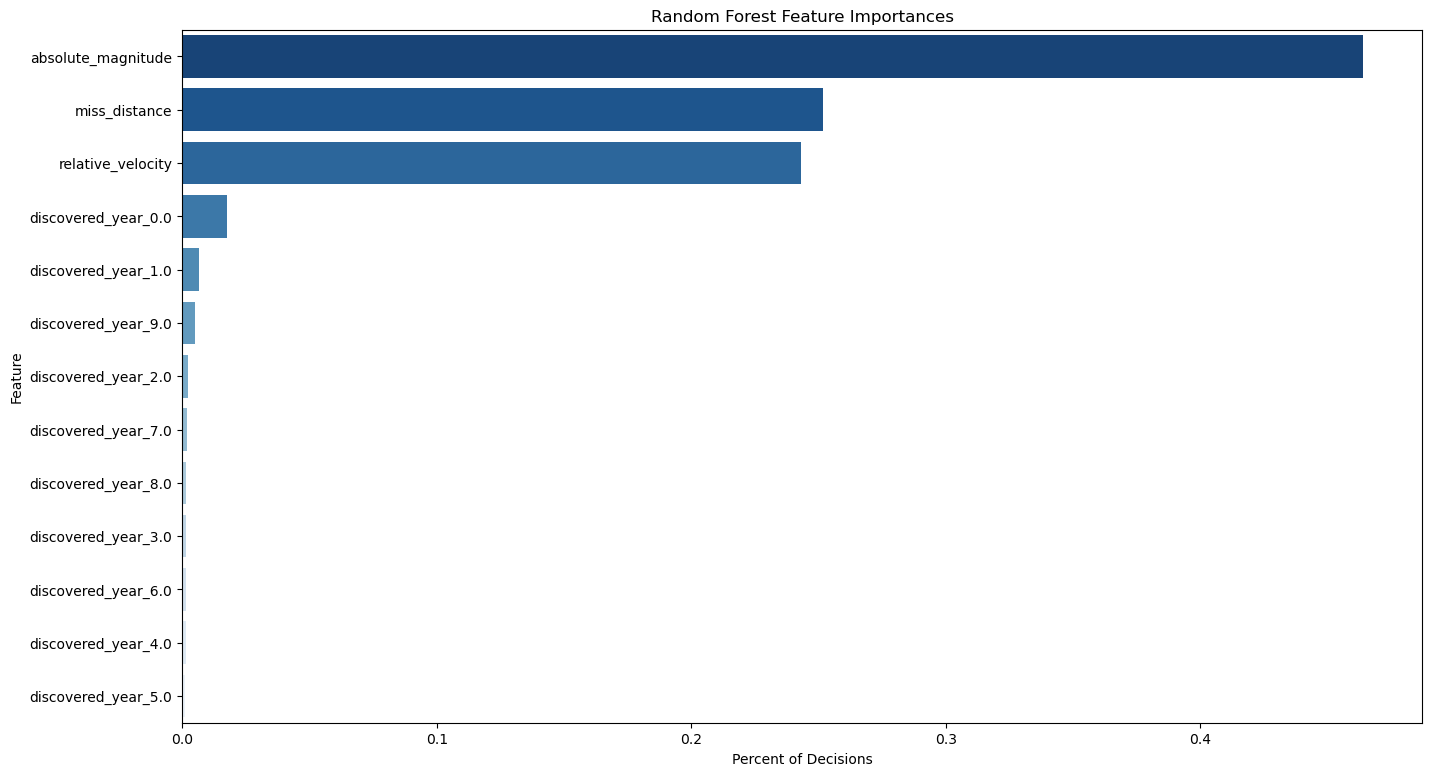

In [47]:
importance_df = pd.DataFrame(
    {'Feature Importances':models['Random Forest'].feature_importances_,
    'Feature Names':models['Random Forest'].feature_names_in_
    })
pal = sns.color_palette("Blues_r",importance_df.shape[0])

plt.figure(figsize=(16,9))
sns.barplot(data=importance_df,x='Feature Importances',y='Feature Names',
           order=importance_df.sort_values('Feature Importances',ascending=False)['Feature Names'],
           palette = pal)
plt.ylabel('Feature')
plt.xlabel('Percent of Decisions')
plt.title('Random Forest Feature Importances')
plt.show()

It appears that the most important feature is the absolute magnitude which makes up nearly 50% of the decisions. Miss distance and relative velocity make up roughly the other half of decisions and discovered year makes up a small percent of the decisions. Let's make a model that does not utilize the year but also does not have interaction variables.

In [48]:
no_year_pipeline = make_pipeline(
        # Scaler
        feature_specific_processor(StandardScaler(),['absolute_magnitude','relative_velocity',
                              'miss_distance']))
X_train_no_year = no_year_pipeline.fit_transform(X_train.drop(columns='discovered_year'))
X_test_no_year = no_year_pipeline.transform(X_test.drop(columns='discovered_year'))

new_models = {
    'Gradient Boosting': GBC(random_state=42),
    'Random Forest': RFC(random_state=42,n_jobs=-1),
    # SVM removed due to runtime
    #'Support Vector Machine': SVC(gamma='auto',random_state=42),
    'Decision Tree': DT(max_depth=15,random_state=42),
    'K Nearest Neighbors': KNN(n_neighbors=20,n_jobs=-1),
    'Discriminant Analysis': LDA(),
    'Gaussian Naive Bayes': GaussianNB()
}

Now let's train models on this new data.

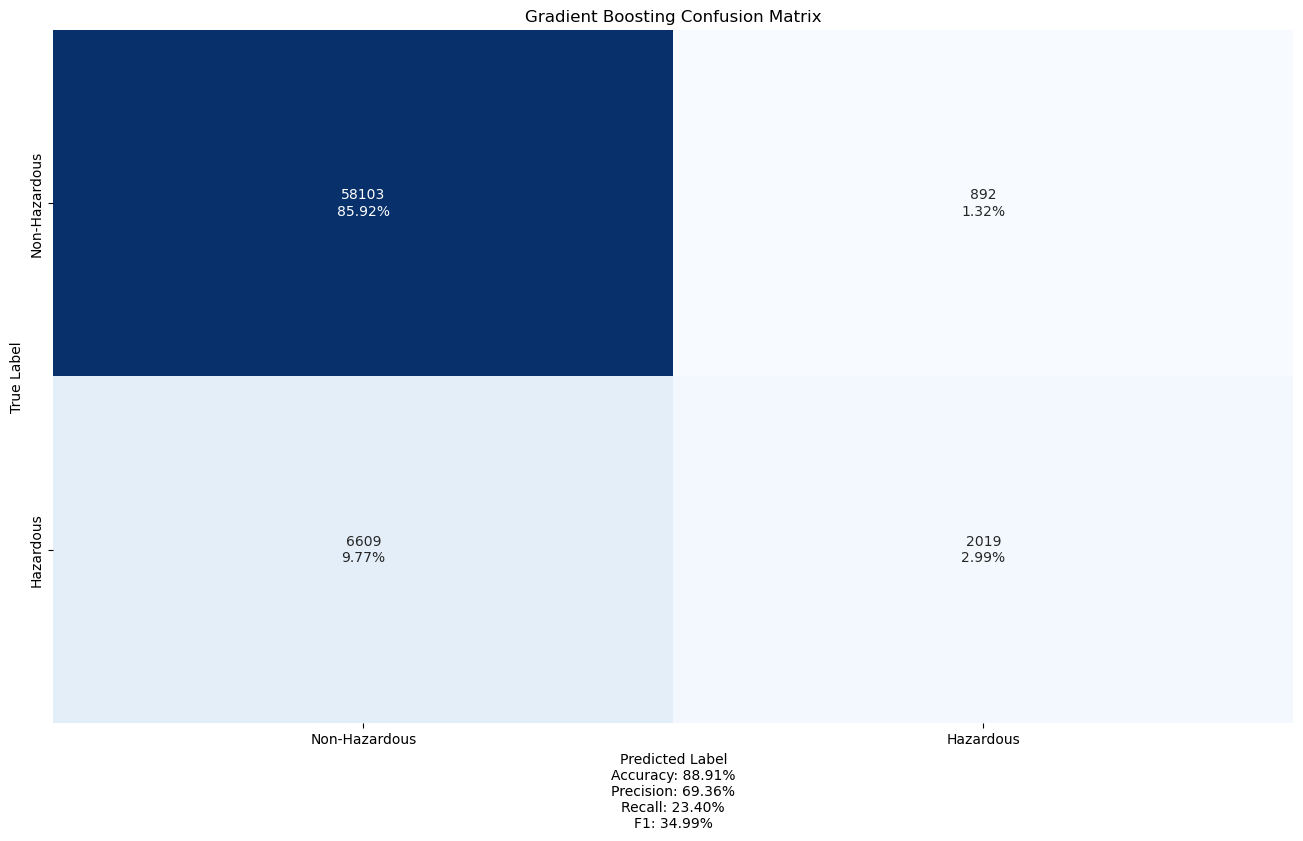

Log loss is: 0.2253


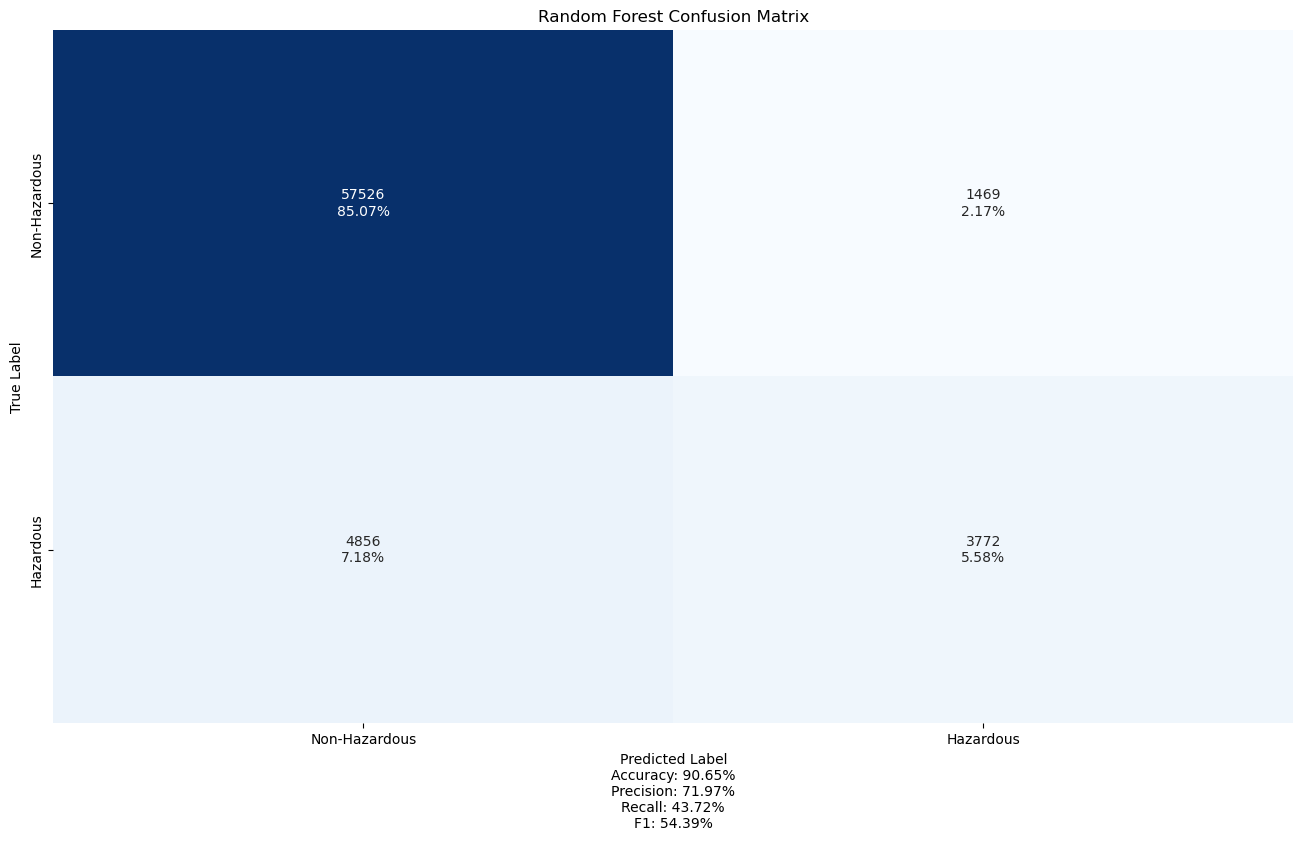

Log loss is: 0.2035


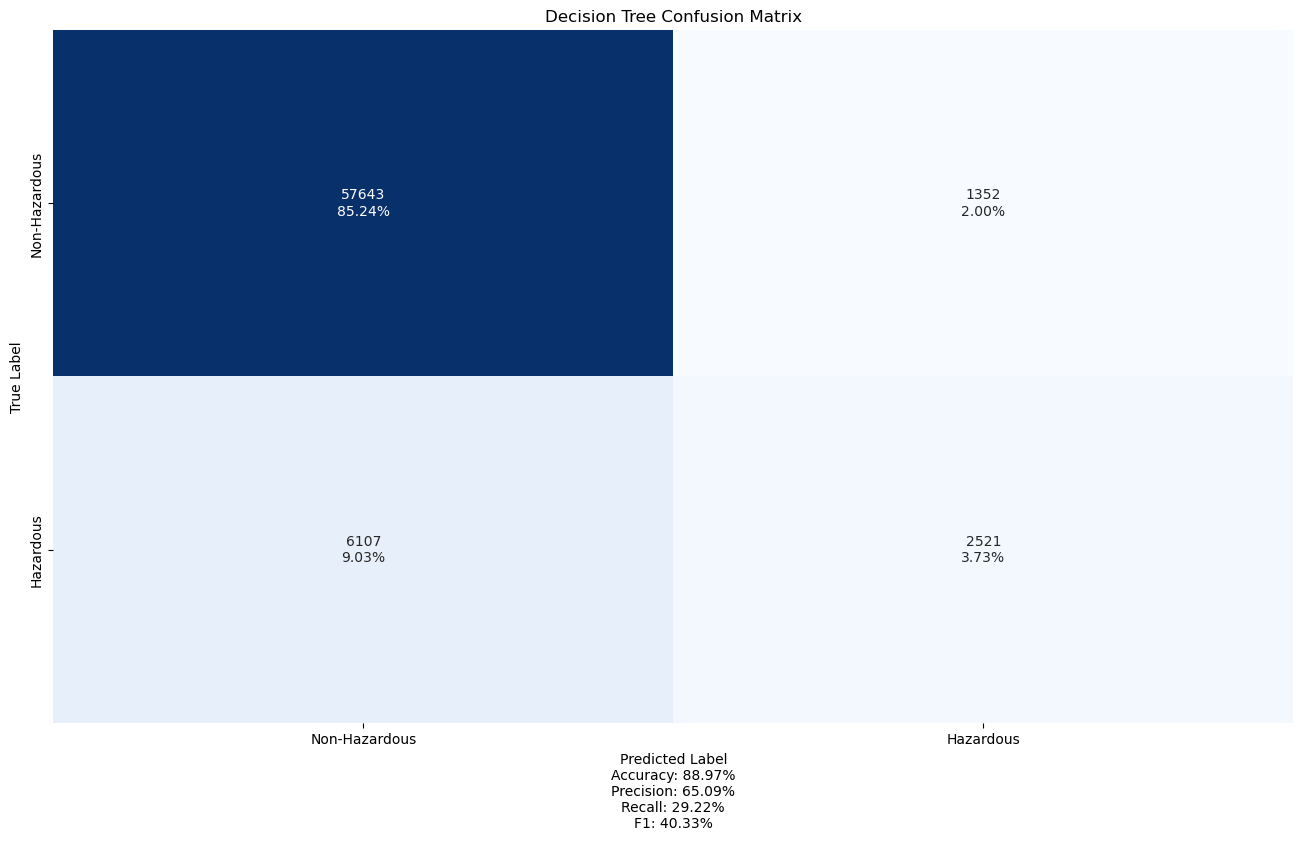

Log loss is: 0.5026


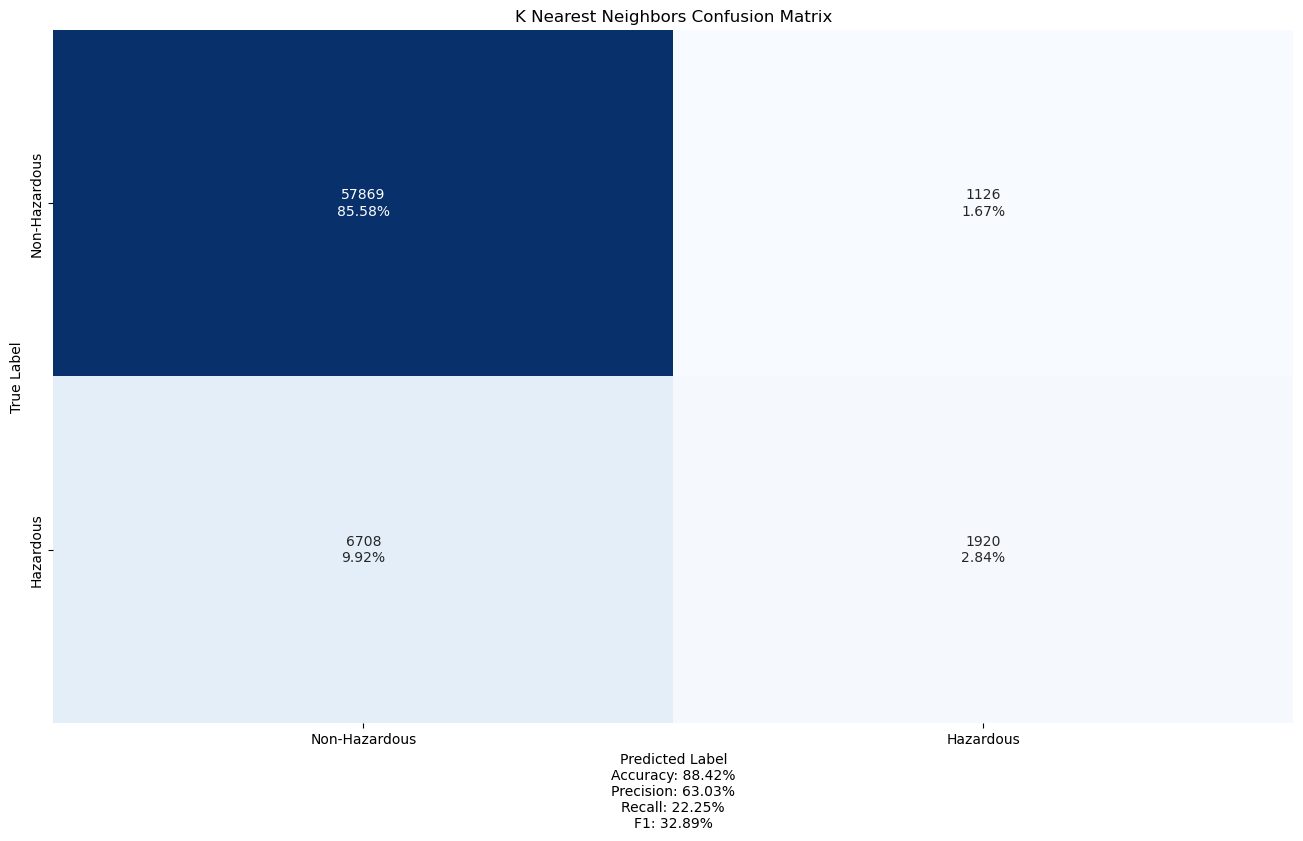

Log loss is: 0.2719


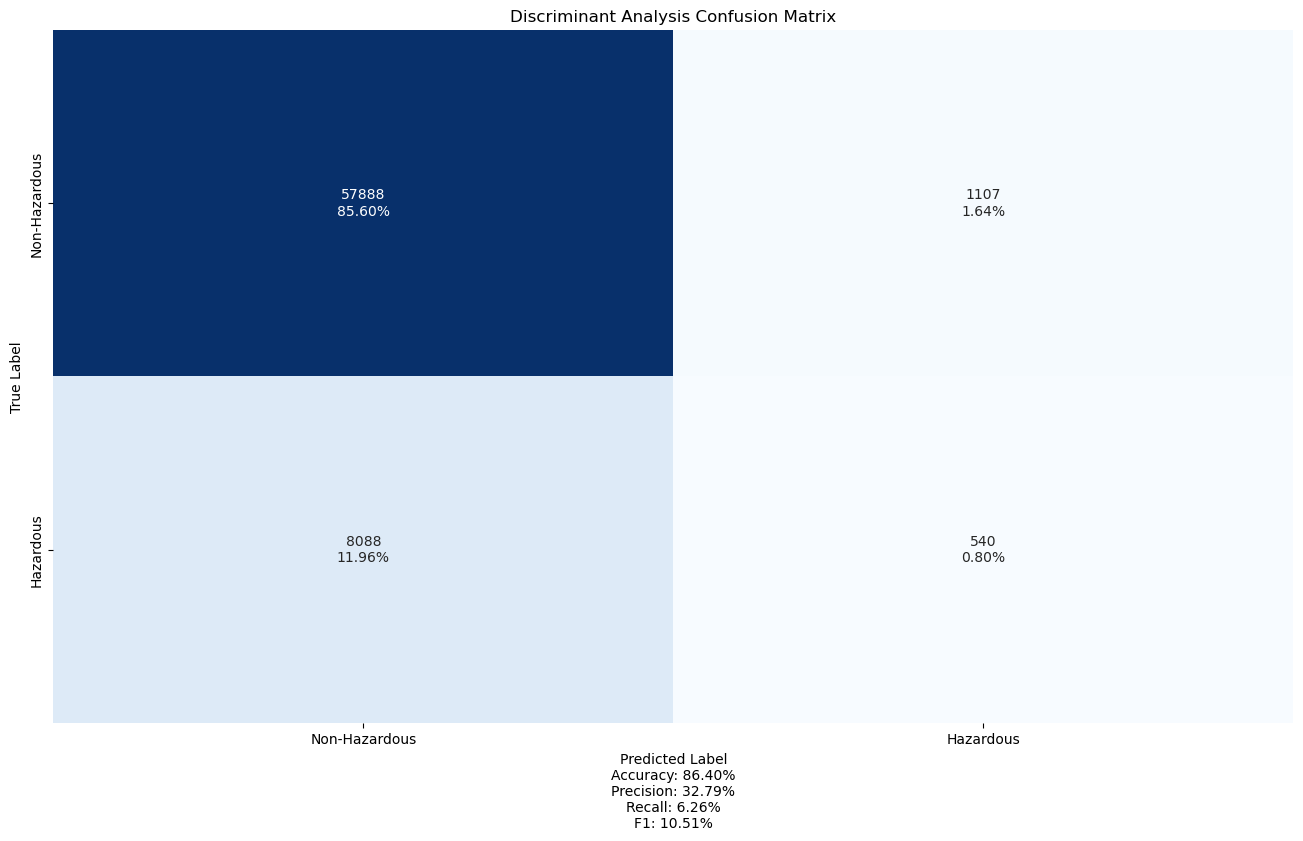

Log loss is: 0.3075


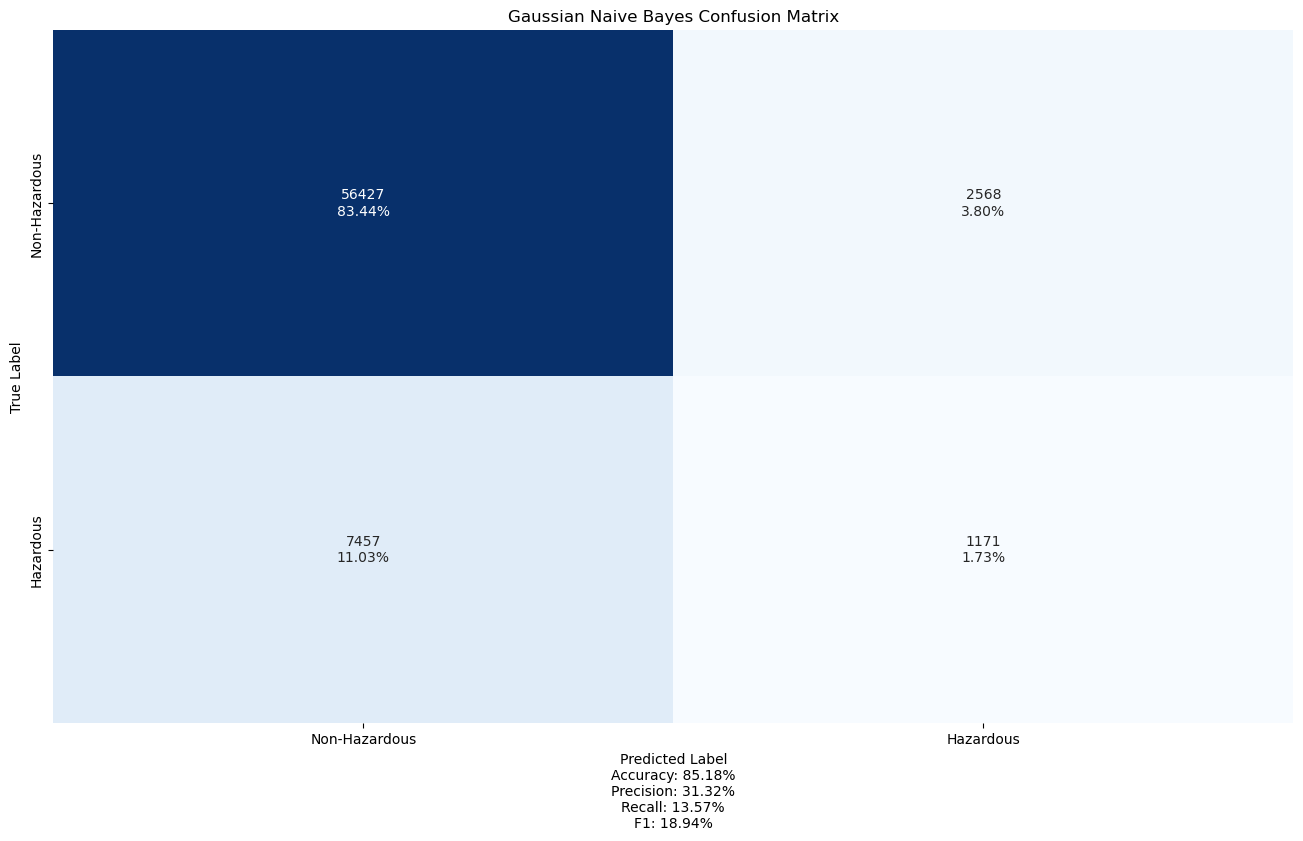

Log loss is: 0.2883


In [49]:
for name, model in new_models.items():
    
    # train the model
    model.fit(X_train_no_year, y_train)
    
    # predict the class
    model_prediction = model.predict(X_test_no_year)
    
    # we'll also get the log loss of our function 
    model_proba_prediction = model.predict_proba(X_test_no_year)
    
    # Evaluate the model
    make_confusion_matrix(y_test,model_prediction,cmap='Blues',
                      cbar=False,xticklabels=['Non-Hazardous','Hazardous'],
                     yticklabels=['Non-Hazardous','Hazardous'],
                     title=f'{name} Confusion Matrix')
    print(f"Log loss is: {log_loss(y_test,model_proba_prediction):.4f}")

This does not have any performance increase. It actually significantly decreases our model performance. We'll stick to just our baseline features then.

## Model Optimizations
This section will go over some model optimizations including parameter tuning, [decision threshold tuning](https://scikit-learn.org/stable/modules/classification_threshold.html), and maybe even a bit of class balancing to get a higher recall (this is actually done in parameter tuning). We'll  start first by trying to do some parameter tuning. We'll be doing this for the random forest model. We'll attempt to do this using [HalvingGridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html#sklearn.model_selection.HalvingGridSearchCV) which significantly decreases the parameter search time while keeping the benefit of choosing a good parameter choice.

In [50]:
# HavlingGridSearchCV is experimental so we need to import this
from sklearn.experimental import enable_halving_search_cv

# scikit-learn version >1.5.0 is required for this code
from sklearn.model_selection import HalvingGridSearchCV, TunedThresholdClassifierCV, FixedThresholdClassifier

Let's create our param grid for our random forest model.

In [51]:
rf_params= {
    'n_estimators': [2, 4, 8, 16, 32, 64, 100, 200],
    'max_depth': [2, 4, 8, 16, 32, 64],
    'criterion':['gini','entropy'],
    'max_features':['sqrt','log2',1,2],
    # This does our class balancing
    'class_weight':['balanced','balanced_subsample',None]
}

base_rf = RFC(random_state=42,n_jobs=1)

Let's now run our halving grid search cv. We'll set n_jobs to -1 since our model will not be running in parallel. We'll use the negative log loss for our scoring since we will eventually be doing decision threshold tuning, and so we want good probability predictions.

In [52]:
# note you might want to comment this out if you run it. 
# I ran this in parallel with 16 threads on a ryzen 7 3700X and it still took like 10 minutes to run 
rf_cv = HalvingGridSearchCV(base_rf,rf_params,cv=5,n_jobs=-1,random_state=42,scoring='neg_log_loss').fit(X_train_base,y_train)

Let's check the best model parameters for this model.

In [53]:
rf_cv.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 64,
 'max_features': 'sqrt',
 'n_estimators': 200}

Now we'll fit and evaluate this best model.

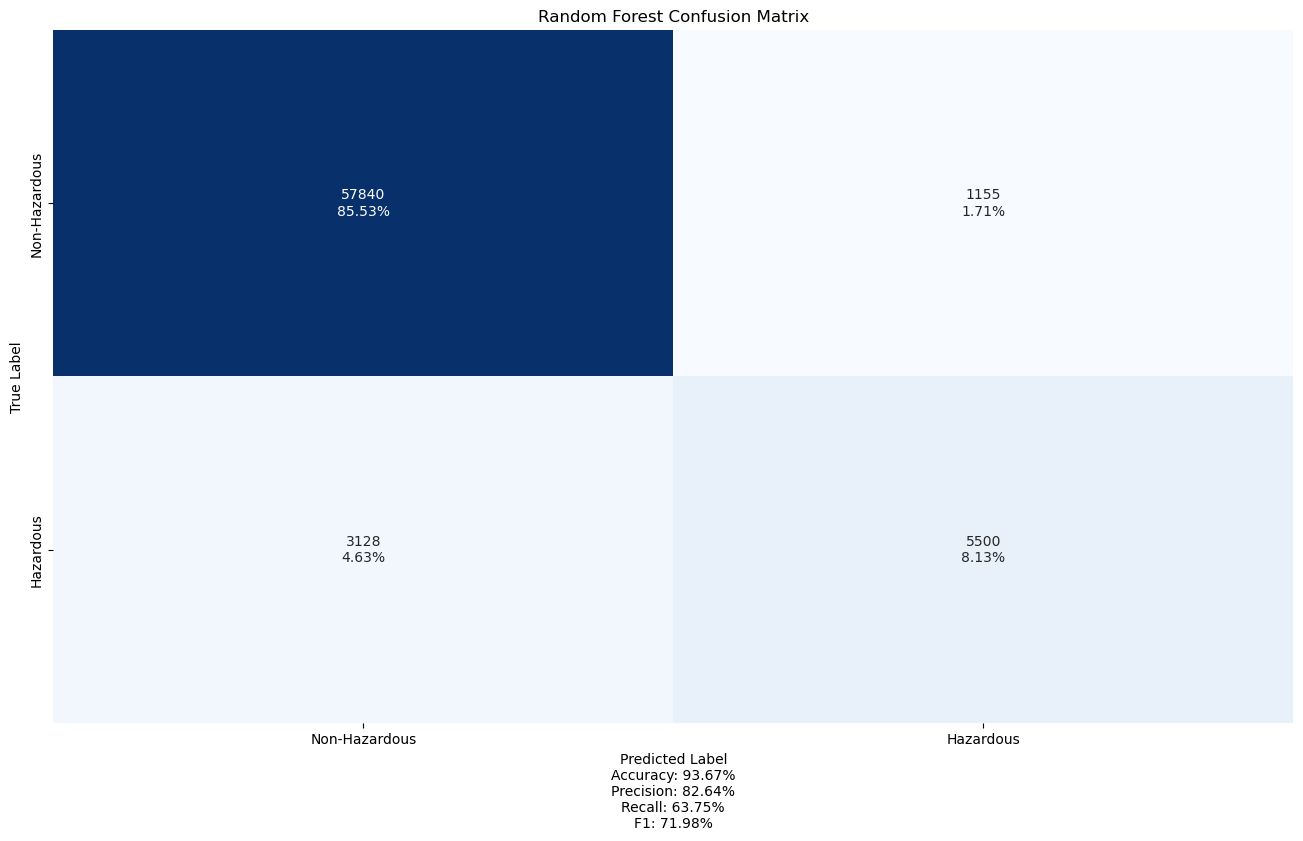

Log loss is: 0.1481


In [54]:
# default of refit = true means we can just get our best estimator
best_rf = rf_cv.best_estimator_
# Set our num jobs to -1
best_rf.n_jobs = -1

# predict the class
model_prediction = best_rf.predict(X_test_base)

# and the predicted probabilities
model_proba_prediction = best_rf.predict_proba(X_test_base)

# Evaluate the model
make_confusion_matrix(y_test,model_prediction,cmap='Blues',
    cbar=False,xticklabels=['Non-Hazardous','Hazardous'],
    yticklabels=['Non-Hazardous','Hazardous'],
    title=f'Random Forest Confusion Matrix')
print(f"Log loss is: {log_loss(y_test,model_proba_prediction):.4f}")

We weren't able to squeeze out any more raw predictive performance as our prediction metrics are roughly the same, but we do see a bit of a decrease to our log loss indicating that our predictive probability is a bit stronger now. We'll move to leverage this better by using the TunedThresholdClassifierCV.

In [55]:
best_rf_tuned = TunedThresholdClassifierCV(best_rf, scoring = 'f1').fit(X_train_base,y_train)
print(f"Cut-off point found at {best_rf_tuned.best_threshold_:.4f}")

Cut-off point found at 0.3737


Let's check what the performance of this threshold tuned model is.

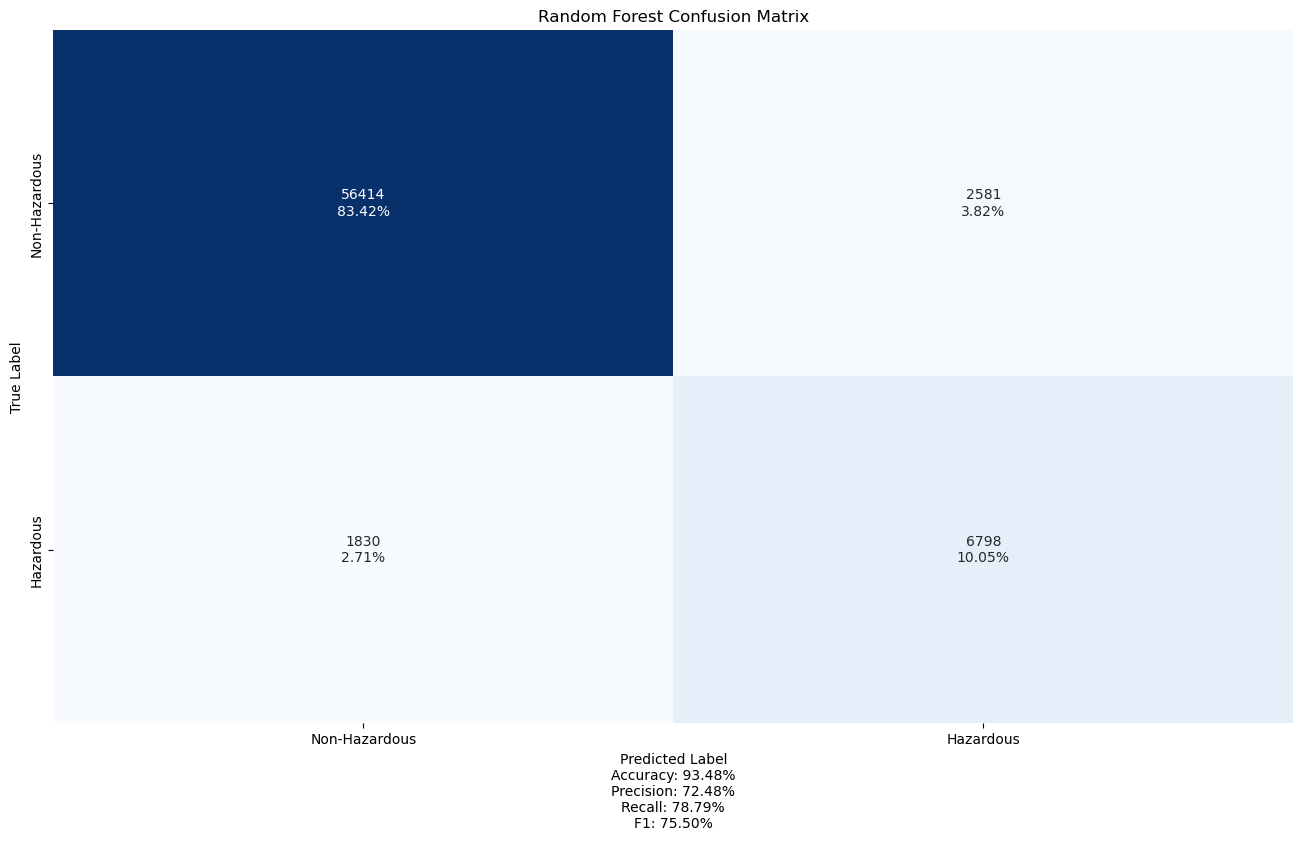

Log loss is: 0.1481


In [56]:
# predict the class
model_prediction = best_rf_tuned.predict(X_test_base)

# and the predicted probabilities
model_proba_prediction = best_rf_tuned.predict_proba(X_test_base)

# Evaluate the model
make_confusion_matrix(y_test,model_prediction,cmap='Blues',
    cbar=False,xticklabels=['Non-Hazardous','Hazardous'],
    yticklabels=['Non-Hazardous','Hazardous'],
    title=f'Random Forest Confusion Matrix')
print(f"Log loss is: {log_loss(y_test,model_proba_prediction):.4f}")

We now have a sizeable increase to our recall at the sacrifice of some precision. This represents our best model yet. The last thing we'll do now is visualize the important features for our best model.

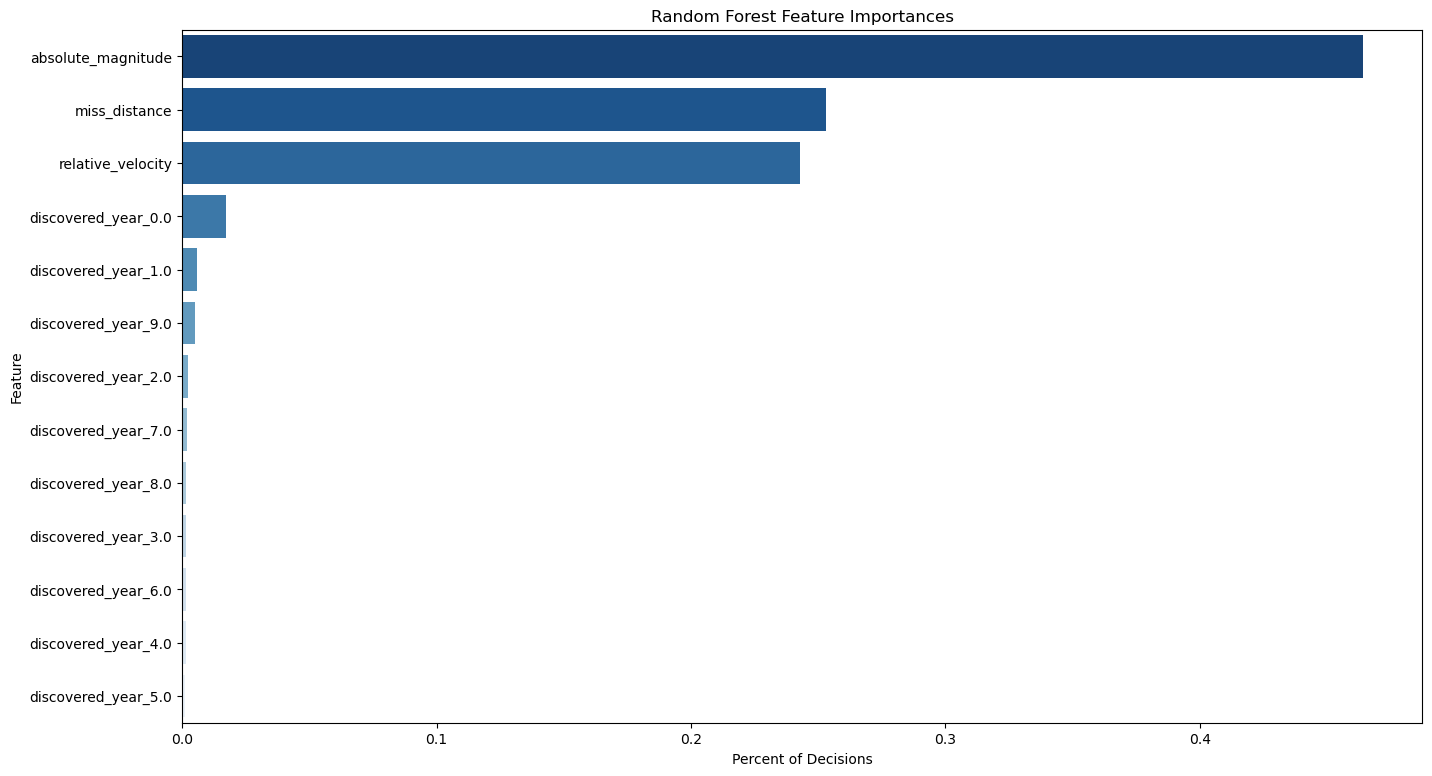

In [57]:
importance_df = pd.DataFrame(
    {'Feature Importances':best_rf.feature_importances_,
    'Feature Names':best_rf.feature_names_in_
    })
pal = sns.color_palette("Blues_r",importance_df.shape[0])

plt.figure(figsize=(16,9))
sns.barplot(data=importance_df,x='Feature Importances',y='Feature Names',
           order=importance_df.sort_values('Feature Importances',ascending=False)['Feature Names'],
           palette=pal)
plt.ylabel('Feature')
plt.xlabel('Percent of Decisions')
plt.title('Random Forest Feature Importances')
plt.show()

Again we see the same things that we saw when looked at the feature importances before. The most important feature is by far the absolute magnitude, or the size of NEO. The other two main features that contribute to model predictive power are velocity and miss distance. 